This file contains a number of auxiliary analyses performed while processing the first EMSE review.
The general goal is to test a number of assumptions as well as calculate some demographics of the used dataset.

## Question 1: Contributor skewness

To how many different projects do high-performing ecosystem developers contribute?

In [1]:
import pandas as pd
from pathlib import Path


path2 = Path('../../data/final_data/dataset_transformed.csv').absolute()
df = pd.read_csv(path2)
print(f"{df.shape=}")
df.head()

df.shape=(1216221, 43)


,ID,Project Name,Submitter ID,PR Number,Closed At,PullRequestIsMerged,ControlIntegratedBySameUser,ControlPullRequestHasComments,ControlPullRequestHasCommentByExternalUser,ControlHasHashTagInDescription,...,ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + WeightedEcosystemSecondOrderDegreeCentrality),ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality),ln(1 + EcosystemLinkIntensity),ln(1 + IntraProjectLinkIntensity)
0,166078092,0xProject/0x-monorepo,1141340,352,2018-02-07T00:15:26Z,True,True,True,True,True,...,0.0,0.0,0.089382,0.077533,0.0,0.0,0.012052,0.161812,0.0,0.000000
1,250614858,0xProject/0x-monorepo,4369805,1587,2019-02-06T10:23:21Z,True,False,True,True,True,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.049564,0.0,0.046636
2,320531534,0xProject/0x-monorepo,8582774,2193,2019-10-07T18:29:34Z,False,True,True,True,True,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.083034,0.0,0.000000
3,144650071,0xProject/0x-monorepo,6204356,181,2017-10-05T06:47:55Z,True,True,True,True,False,...,0.0,0.0,0.141667,0.077533,0.0,0.0,0.060473,0.117866,0.0,0.000000
4,235634715,0xProject/0x-monorepo,210914,1371,2018-12-05T01:20:59Z,True,True,True,True,True,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.225033,0.0,0.000000


submissions_per_user.shape=(190563,)


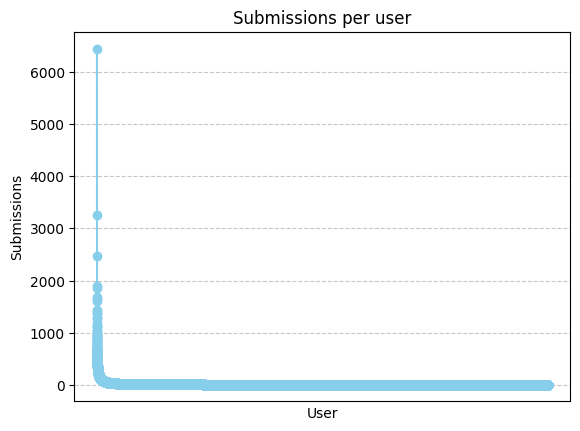

In [139]:
import matplotlib.pyplot as plt

eco_fields = [col for col in df.columns if 'Ecosystem' in col]
eco_devs = df[(df[eco_fields].sum(axis=1) > 0)]
# There is some error here as the first project they contributed to is missing from this set.
# This doesn't matter, though, as we're only using people with a "huge number of projects committed to".

submissions_per_user = df['Submitter ID'].value_counts()
print(f'{submissions_per_user.shape=}')

plt.plot(submissions_per_user.values, marker='o',
         color='skyblue', linestyle='-')
plt.title('Submissions per user')
plt.ylabel('Submissions')
plt.xlabel('User')
plt.xticks(ticks=[])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

So, even in the subsampled dataset, there are a couple of users with a huge number of PRs.

In [140]:
qdf = df.groupby('Submitter ID')
number_of_projects = qdf['Project Name'].unique().apply(len)

Submitter ID
8518239     780
557895      297
947110      292
6374832     290
827205      281
           ... 
2311075       1
2310795       1
2310703       1
2310694       1
59734442      1
Name: Project Name, Length: 190563, dtype: int64


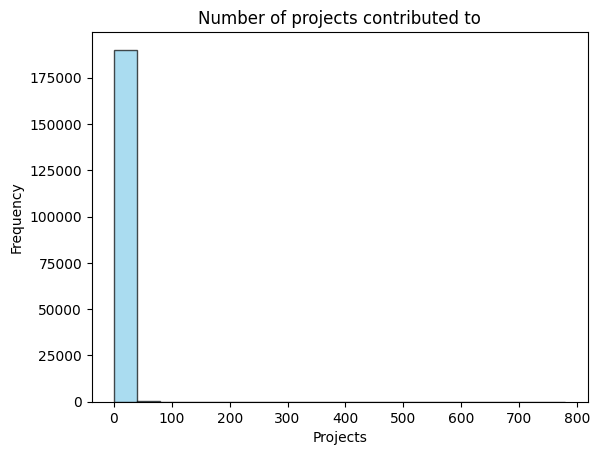

In [141]:
print(number_of_projects.sort_values(ascending=False))


def my_hist(number_of_projects):

    plt.hist(number_of_projects, bins=20, color='skyblue',
             edgecolor='black', alpha=0.7)
    plt.title('Number of projects contributed to')
    plt.xlabel('Projects')
    plt.ylabel('Frequency')
    plt.show()


my_hist(number_of_projects)

And a number of developers have contributed to a huge number of ecosystem projects.

threshold=300
Preserved 1215383/1216221 PRs (99.93%)
Preserved 190562/190563 users (100.00%)


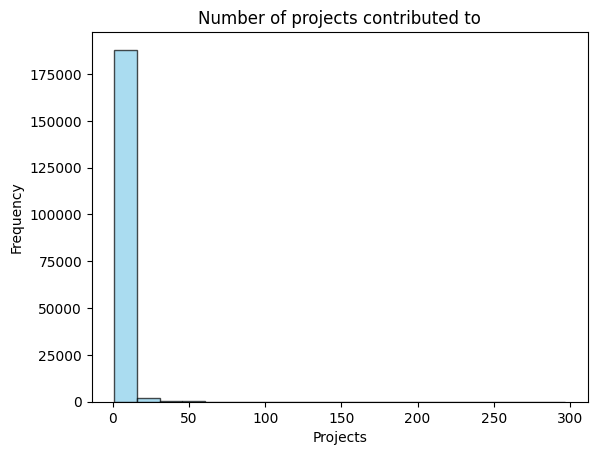

threshold=60
Preserved 1130115/1216221 PRs (92.92%)
Preserved 190355/190563 users (99.89%)


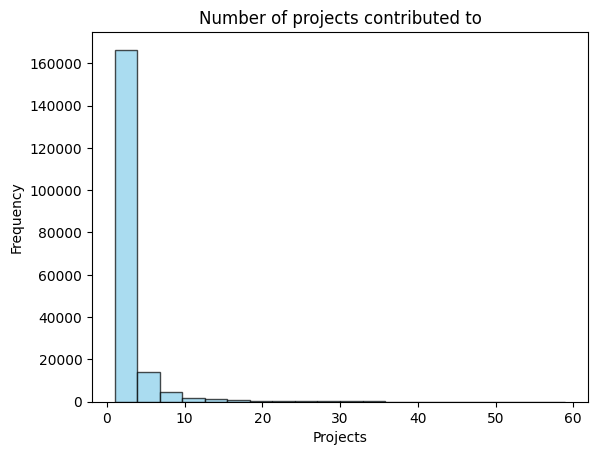

threshold=20
Preserved 938394/1216221 PRs (77.16%)
Preserved 188808/190563 users (99.08%)


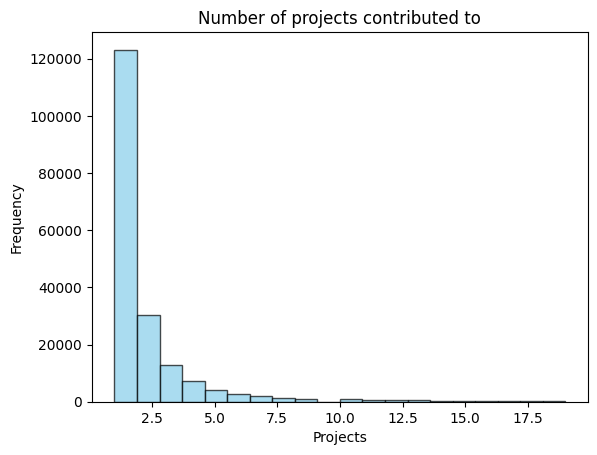

In [142]:
for threshold in [300, 60, 20]:
    print(f'{threshold=}')
    my_number_of_projects = number_of_projects[number_of_projects < threshold]

    my_col_df = df[my_col_df['Submitter ID'].isin(my_number_of_projects.index)]
    my_my_my_my_my_my_my_my_my_df_perc = my_col_df.shape[0] / df.shape[0] * 100
    my_users_perc = my_number_of_projects.shape[0] / \
        number_of_projects.shape[0] * 100
    print(
        f'Preserved {my_col_df.shape[0]}/{df.shape[0]} PRs ({my_df_perc:.2f}%)')
    print(
        f'Preserved {my_number_of_projects.shape[0]}/{number_of_projects.shape[0]} users ({my_users_perc:.2f}%)')

    my_hist(my_number_of_projects)

### Answer 
So, the top contributors are responsible for a differing number of PRs.
Depending on the definition of a "top contributor" in terms of the number of projects contributed to, the top **<1% to 1%** are responsible for **<1% to 23%** of the PRs in the dataset.

### Follow-up Question A: Impact

*Does removing top contributors from the dataset affect the outcomes for the ME logit model?*

*For simplicity of the test, I make a number of assumptions:*
- Multicollinearity is the same
- log linearity is the same

Realistically, this all needs to be checked.

#### Ecosystem model

In [175]:
import statsmodels.api as sm
import scipy
import numpy as np
from python_proj.utils.util import get_matching

from wmutils.pandas.transforms import min_max_scale
from statsmodels.regression.mixed_linear_model import MixedLM


def do_lr_pipeline(feature_regex: str, multicollinear_fields: list, threshold: int = 20):
    """
    I built this make-shift pipeline to simplify running the Logit models.
    It's basically a concatenation of the original NBs, but makes the above-stated assumptions.

    The default "top contributor" threshold is 20; this is pretty aggressive.
    """

    my_number_of_projects = number_of_projects[number_of_projects < threshold]
    my_df = df[df['Submitter ID'].isin(my_number_of_projects.index)]

    print(f'{my_df.shape=}')

    metadata_fields = ["ID", "Project Name",
                       "Submitter ID", "PR Number", "Closed At"]
    pr_merged_key = "PullRequestIsMerged"
    dependent_fields = [pr_merged_key]

    independent_fields = [
        field
        for field in my_df.columns
        if (field not in metadata_fields and field not in dependent_fields)
    ]

    # Identifies the to-be-dropped features

    has_dependency_no_otheers_pattern = (
        feature_regex
    )
    dropped_fields = list(
        get_matching(independent_fields, has_dependency_no_otheers_pattern)
    )

    print(f"{len(dropped_fields)=}")
    print(f"{dropped_fields=}")

    # Drops the selected features

    my_df = my_df.drop(dropped_fields, axis=1)
    independent_fields = [
        field for field in independent_fields if field not in dropped_fields
    ]

    print(f"{len(my_df.columns)=}")
    my_df.describe()

    print(
        f"Removing {len(multicollinear_fields)} / {len(independent_fields)} fields to account for multicollinearity."
    )

    # Drops fields.
    df = my_df[independent_fields].drop(multicollinear_fields, axis=1)

    print(f"{len(df)=}")
    print(f"{len(df.columns)=}")
    print(f"{df.columns=}")

    # Replaces binary values with numeric variants so VIF can be calculated.

    value_mapper = {False: 0, True: 1}

    binary_fields = df.select_dtypes(exclude="number")
    print(f"{len(binary_fields.columns)=}")
    for feature in binary_fields:
        df[feature] = df[feature].replace(value_mapper)

    X_constant = sm.add_constant(df)

    # Use GLM method for logreg here so that we can retrieve the influence measures
    logit_results = sm.GLM(
        my_df[pr_merged_key], X_constant, family=sm.families.Binomial()
    ).fit()

    # Get influence measures
    influence = logit_results.get_influence()

    # Obtain summary df of influence measures
    summ_df = influence.summary_frame()

    # Filter summary df to Cook's distance values only
    diagnosis_df = summ_df[["cooks_d"]]

    # Set Cook's distance threshold
    cook_threshold = 4 / len(df)

    # Append absolute standardized residual values
    diagnosis_df["std_resid"] = scipy.stats.zscore(logit_results.resid_pearson)
    diagnosis_df["std_resid"] = diagnosis_df["std_resid"].apply(
        lambda x: np.abs(x))

    # Find observations which are BOTH outlier (std dev > 3) and highly influential
    extreme = diagnosis_df[
        (diagnosis_df["cooks_d"] > cook_threshold) & (
            diagnosis_df["std_resid"] > 3)
    ]

    # Show top 5 highly influential outlier observations
    extreme.sort_values("cooks_d", ascending=False).head(10)

    df = df.drop(extreme.index)
    tested_dependents = my_df[pr_merged_key].drop(extreme.index)

    print(f"{len(df)=}")
    print(f"{my_df.shape=}")

    # Re-scales the data to account for removed outliers.
    tested_numeric_predictors = [
        col
        for col in df.select_dtypes(include="number").columns
        if col not in metadata_fields
    ]
    df = min_max_scale(df, tested_numeric_predictors)

    # Selects relevant project names.
    pn_key = "Project Name"
    tested_projects = df[pn_key].copy()
    tested_projects = tested_projects[df.index]

    # Creates model.
    mixed_model = MixedLM(
        tested_dependents,
        df,
        tested_projects,
    ).fit()

    mixed_model.summary()
    return mixed_model

#### Ecosystem model


In [176]:
eco_feat_regex = r"(.*(?=Dependency).*|.*Weighted.*|.*LinkIntensity.*)"
eco_multicollinear_fields = [
    # Confounds
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # eco
    "EcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + EcosystemExperienceSubmitterIssueCommentCount)",
    # intra-proj
    # "ln(1 + IntraProjectSubmitterIssueSubmissionCount)",
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "IntraProjectSubmitterPullRequestSuccessRate",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
]

eco_model = do_lr_pipeline(eco_feat_regex, eco_multicollinear_fields)
eco_model.summary()

my_df.shape=(938394, 43)
len(dropped_fields)=19
dropped_fields=['DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterIssue

/tmp/ipykernel_92471/2657352043.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = scipy.stats.zscore(logit_results.resid_pearson)
/tmp/ipykernel_92471/2657352043.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = diagnosis_df["std_resid"].apply(


len(logit_df)=921124
my_df.shape=(938394, 24)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Mixed Linear Model Regression Results
===========================================================================================================
Model:                          MixedLM               Dependent Variable:               PullRequestIsMerged
No. Observations:               921124                Method:                           REML               
No. Groups:                     19356                 Scale:                            0.1108             
Min. group size:                1                     Log-Likelihood:                   -345502.8217       
Max. group size:                688                   Converged:                        Yes                
Mean group size:                47.6                                                                       
-----------------------------------------------------------------------------------------------------------
                                                               Coef.  Std.Err.    z     P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------------------
ControlIntegratedBySameUser                                    -0.299    0.001 -313.850 0.000 -0.301 -0.297
ControlPullRequestHasComments                                  -0.130    0.001 -131.707 0.000 -0.132 -0.128
ControlPullRequestHasCommentByExternalUser                      0.029    0.001   27.803 0.000  0.027  0.031
ControlHasHashTagInDescription                                  0.039    0.001   47.097 0.000  0.038  0.041
SubmitterIsFirstTimeContributor                                -0.132    0.001 -140.158 0.000 -0.134 -0.130
ln(1 + ControlPullRequestLifeTimeInMinutes)                    -0.470    0.002 -244.066 0.000 -0.473 -0.466
ln(1 + ControlNumberOfCommitsInPullRequest)                     0.150    0.005   28.609 0.000  0.140  0.160
ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)  0.251    0.003   84.756 0.000  0.245  0.256
ln(1 + IntraProjectSubmitterIssueSubmissionCount)               0.290    0.004   77.593 0.000  0.282  0.297
Group Var                                                       1.399    0.045                             
===========================================================================================================

"""

#### Collaboration model

Evaluates the previously posed question for the collaboration model.

In [173]:
coll_feat_regex = r"^(?!.*(?:LinkIntensity|DegreeCentrality))(?=.*Ecosystem).*"
coll_multicollinear_fields = [
    # Confounding factor
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # Correlating Controls
    # "ControlIntegratedBySameUser",
    # "ControlPullRequestHasComments",
    # Intra link intensity
    "ControlIntegratedBySameUser",
    "ln(1 + IntraProjectLinkIntensity)",
    # Intra experience
    "IntraProjectSubmitterPullRequestSuccessRate",
    "SubmitterIsFirstTimeContributor",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
    # "ln(1 + IntraProjectSubmitterIssueSubmissionCount)",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality)",
]

coll_model = do_lr_pipeline(coll_feat_regex, coll_multicollinear_fields)
coll_model.summary()

my_df.shape=(938394, 43)
len(dropped_fields)=20
dropped_fields=['EcosystemExperienceSubmitterPullRequestSuccessRate', 'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + EcosystemExpe

/tmp/ipykernel_92471/2153574785.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = scipy.stats.zscore(logit_results.resid_pearson)
/tmp/ipykernel_92471/2153574785.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = diagnosis_df["std_resid"].apply(


len(logit_df)=919864
my_df.shape=(938394, 23)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Mixed Linear Model Regression Results
=================================================================================================
Model:                        MixedLM           Dependent Variable:           PullRequestIsMerged
No. Observations:             919864            Method:                       REML               
No. Groups:                   19347             Scale:                        0.1212             
Min. group size:              1                 Log-Likelihood:               -382094.9524       
Max. group size:              688               Converged:                    Yes                
Mean group size:              47.5                                                               
-------------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.    z     P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
ControlPullRequestHasComments                        -0.117    0.001 -115.501 0.000 -0.119 -0.115
ControlPullRequestHasCommentByExternalUser           -0.012    0.001  -11.391 0.000 -0.014 -0.010
ControlHasHashTagInDescription                        0.044    0.001   50.998 0.000  0.043  0.046
ln(1 + ControlPullRequestLifeTimeInMinutes)          -0.401    0.002 -204.132 0.000 -0.405 -0.397
ln(1 + ControlNumberOfCommitsInPullRequest)           0.072    0.005   13.219 0.000  0.061  0.083
ln(1 + IntraProjectSubmitterIssueSubmissionCount)     0.208    0.004   55.111 0.000  0.201  0.215
ln(1 + WeightedEcosystemSecondOrderDegreeCentrality)  0.122    0.005   23.291 0.000  0.112  0.132
ln(1 + EcosystemLinkIntensity)                        0.422    0.008   54.027 0.000  0.407  0.437
Group Var                                             1.008    0.031                             
=================================================================================================

"""

#### Dependency model

Evaluates the posedd question on the dependency model.

In [174]:
dep_feat_regex = r"^(?:(?!Dependency|Control|IntraProject(?!LinkIntensity|SecondOrder)|SubmitterIsFirstTimeContributor).)*$"
dep_multicollinear_fields = [
    # Confounds
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # # dep
    "DependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # Inv. dep
    "InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # non-dep
    "NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # intra-proj
    "IntraProjectSubmitterPullRequestSuccessRate",
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
]

dep_model = do_lr_pipeline(dep_feat_regex, dep_multicollinear_fields)
dep_model.summary()

my_df.shape=(938394, 43)
len(dropped_fields)=9
dropped_fields=['EcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterIssueCommentCount)', 'ln(1 + WeightedEcosystemSecondOrderDegreeCentrality)', 'ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality)', 'ln(1 + EcosystemLinkIntensity)', 'ln(1 + IntraProjectLinkIntensity)']
len(my_df.columns)=34
Removing 17 / 28 fields to account for multicollinearity.
len(logit_df)=938394
len(logit_df.columns)=11
logit_df.columns=Index(['ControlIntegratedBySameUser', 'ControlPullRequestHasComments',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription', 'SubmitterIsFirstTimeContributor',
       'ln(1 + ControlPullRequestLifeTimeInMinutes)',
       'ln(1 + ControlNumberOfCommitsInPullRequest)',


/tmp/ipykernel_92471/2153574785.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = scipy.stats.zscore(logit_results.resid_pearson)
/tmp/ipykernel_92471/2153574785.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = diagnosis_df["std_resid"].apply(


len(logit_df)=921601
my_df.shape=(938394, 34)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                            Mixed Linear Model Regression Results
=============================================================================================================================
Model:                                MixedLM                     Dependent Variable:                     PullRequestIsMerged
No. Observations:                     921601                      Method:                                 REML               
No. Groups:                           19356                       Scale:                                  0.1111             
Min. group size:                      1                           Log-Likelihood:                         -346725.1052       
Max. group size:                      688                         Converged:                              Yes                
Mean group size:                      47.6                                                                                   
-----------------------------------------------------------------------------------------------------------------------------
                                                                                 Coef.  Std.Err.    z     P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------------------------------------
ControlIntegratedBySameUser                                                      -0.299    0.001 -313.386 0.000 -0.301 -0.297
ControlPullRequestHasComments                                                    -0.129    0.001 -131.292 0.000 -0.131 -0.127
ControlPullRequestHasCommentByExternalUser                                        0.028    0.001   27.428 0.000  0.026  0.030
ControlHasHashTagInDescription                                                    0.039    0.001   47.310 0.000  0.038  0.041
SubmitterIsFirstTimeContributor                                                  -0.131    0.001 -139.713 0.000 -0.133 -0.130
ln(1 + ControlPullRequestLifeTimeInMinutes)                                      -0.468    0.002 -242.760 0.000 -0.471 -0.464
ln(1 + ControlNumberOfCommitsInPullRequest)                                       0.150    0.005   28.628 0.000  0.140  0.160
ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)          0.177    0.007   26.776 0.000  0.164  0.190
ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)       0.224    0.003   71.712 0.000  0.218  0.230
ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)  0.120    0.008   15.488 0.000  0.105  0.136
ln(1 + IntraProjectSubmitterIssueSubmissionCount)                                 0.289    0.004   77.356 0.000  0.282  0.296
Group Var                                                                         1.399    0.044                             
=============================================================================================================================

"""

### Answer

We compare with the results shown [here](python_proj/modelling/notebooks/logistic_regression/general/).


#### Ecosystem model

Overall, the results are the same.
The errors remain unchanged.
I observe the following differences in coefficients (which changed more than 0.01):
- self-integrated went from -0.262 to -0.299 (i.e., -0.037)
- pr age went from -0.482 to -0.470 (+0.012)
- commit count went from 0.189 to 0.150 (+0.039)
- intra contributiosn went from 0.272 to 0.290 (+0.018)

The order of intra vs ecosystem remains unchanged.
Most differences regard the control variables, which are not the subject of study.
The order of intra vs. ecosystem contributions remains the same, and the ballpark percentage of intra-project contributions remains the same too.
In conclusion, I would argue that the impact is minimal, thus **not warranting a change to the methodology**.

Because the definition of "top ecosystem contributor" was pretty tight in this experiment already (dropping 23% of the PRs) and the impact is minimal, there is no need to explore with weaker definitions as these would only converge towards the original results.


#### Dependency model

Generally, the results are the same again. We can see the following coefficient changes:
- self integrated changed from -0.261 tot -0.299 (-0.038)
- pr age went from -0.478 to -0.468 (+0.01)
- commits went from 0.186 to 0.15 (-0.036)
- downstream went from 0.128 to 0.177 (+0.049)
- upstream went from 0.097 to 0.120 (+0.023)
- intra went from 0.274 to 0.289 (+0.015)

Quite some variables changed at least 1pp in their coefficients.
Although these changes, the relationships across variables remains the same.
Interestingly, the impact of the ecosystem variables only went up, but the standard error only went up slightly as well for these features.

Although the numbers changed slightly, the conclusions haven't. For which I'd argue there is only minor support for changing the method.


#### Collaboration model

Generally, the results are the same again, but we can see the following differences:
- pr lifetimechanged from -0.435 to -0.401 (+0.034)
- commits went from 0.124 to 0.072 (-0.052)
- so-degree went from 0.167 to 0.122 (-0.045)
- link strength went from 0.322 to 0.422 (+0.1)

Again, the conclusions don't change, as the order across coefficients and significances haven't changed.
The difference here is quite substantial, though, such that the gap between so-degree and link strength became quite large, increasing 14.5pp, such that so-degree became less important and link strenght became even more important. This is extra interesting because this is the general model, which doesn't emphasize (non-)newcomers yet. This gives quite strong support to alter the method.


#### General conclusions

From the ecosystem and dependency models, there is little support to change the model, as the coefficients do not change substantially (at best 5pp), and the order among variables does not change either.
In principle these two points hold for the collaboration model as well, however, the gap between so-degree and link strength changed quite substantially (15pp) where so-degree decreased with 5pp and link strength increased with 10pp.
This is a meaningful result, however, I also think we can get away with just mentioning it as an auxiliary result. This could be summarized along the lines of *"One might want to account for individuals that are highly active in the ecosystem, which might affect the results. However, after exploring its effect, removing these individuals, generally yielded very similar results, such that the coefficients never changed more than 5pp. One result does stand out, however, as direct collaboration increased by 10pp, which community standing decreased by 5pp. This emphasizes the importance of direct collaboration even further."*


## Question 2: Activity distribution

How are the different development activities distributed across small and large projects?

*We already have an idea about how PRs activities are distributed acros projects (long-tail distribution), but not yet how the other ones are and whether the proportions of activities are different from large/small projects.*

In [2]:
import json
from python_proj.utils.exp_utils import get_owner_and_repo_from_source_path
import tqdm

issues_path = Path(
    '../../data/development_activities/issues_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes.json').absolute()
prs_path = Path(
    '../../data/development_activities/pulls_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes.json').absolute()


def yield_entries():
    def __inner_yield_entries(path: Path, entry_type: str):
        print(f'yielding from "{path=}"')
        with open(path, 'r') as jsonl_data:
            for line in jsonl_data:
                entry = json.loads(line)
                yield entry_type, entry
    yield from __inner_yield_entries(issues_path, "issue")
    yield from __inner_yield_entries(prs_path, "pr")


def df_entry_generator():
    for entry_type, entry in tqdm.tqdm(yield_entries()):
        owner, repo = get_owner_and_repo_from_source_path(
            entry["__source_path"])
        base_activity_number = entry['number']

        # This works for both issues and PRs.
        submitter = entry["user_data"]["id"]
        yield [owner, repo, base_activity_number, submitter, entry_type]

        if entry['comments'] == 0:
            continue

        comment_entry_type = f'{entry_type}_comment'
        for comment in entry['comments_data']:
            commenter_id = comment['user_data']["id"]
            yield [owner, repo, base_activity_number, commenter_id, comment_entry_type]


# NOTE: This is quite slow as it needs to iterate through ~4 million json lines. When I ran it, it took about 20 minutes to complete.
cols = ['Project Owner', "Repository Name",
        "Base Activity Number", "User ID", "Activity Type"]
df = pd.DataFrame(df_entry_generator(), columns=cols)

df.head()

272it [00:00, 2719.75it/s]

yielding from "path=PosixPath('/workspaces/msc_thesis/python_proj/modelling/../../data/development_activities/issues_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes.json')"


2168910it [09:26, 4698.69it/s]

yielding from "path=PosixPath('/workspaces/msc_thesis/python_proj/modelling/../../data/development_activities/pulls_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes.json')"


3984069it [19:52, 3339.75it/s]


,Project Owner,Repository Name,Base Activity Number,User ID,Activity Type
0,rails,rails,2,10476,issue
1,rails,rails,2,10137,issue_comment
2,rails,rails,2,13589,issue_comment
3,rails,rails,2,15641,issue_comment
4,rails,rails,2,12610,issue_comment


In [4]:
activity_df_path = Path('../../data/tmp/dev_activities.csv').absolute()
df.to_csv(activity_df_path, index=False)

In [181]:
import pandas as pd

activity_df_path = Path('../../data/tmp/dev_activities.csv').absolute()
df = pd.read_csv(activity_df_path, header=0)

In [182]:
def build_proj_id(row):
    owner = row['Project Owner']
    repo = row["Repository Name"]
    proj_id = f'{owner}/{repo}'
    return proj_id


df['Project ID'] = df.apply(build_proj_id, axis=1)

In [183]:
df_project = df.groupby("Project ID")
proj_activity_counts = df_project['Activity Type'].value_counts()

In [184]:
proj_activity_counts = proj_activity_counts.groupby("Project ID")

In [185]:
activity_types = df['Activity Type'].unique()


def my_reshape():
    for key in proj_activity_counts.groups:
        dat = proj_activity_counts.get_group(key)
        dat = dat.unstack().reset_index()
        for _, row in dat.iterrows():
            new_entry = list()
            new_entry.append(row['Project ID'])
            for act in activity_types:
                if not act in row:
                    new_entry.append(0)
                else:
                    new_entry.append(row[act])
            yield new_entry


proj_activities = pd.DataFrame(
    my_reshape(), columns=["Project ID", *activity_types])

In [186]:
proj_activities.describe()

,issue,issue_comment,pr,pr_comment
count,20052.000000,20052.000000,20052.000000,20052.000000
mean,108.123728,401.356473,90.563136,203.721923
std,753.641171,3109.905034,590.953191,1968.363210
min,0.000000,0.000000,1.000000,0.000000
25%,4.000000,7.000000,9.000000,10.000000
50%,14.000000,35.000000,18.000000,27.000000
75%,49.000000,148.000000,49.000000,82.000000
max,72504.000000,271584.000000,34613.000000,120031.000000


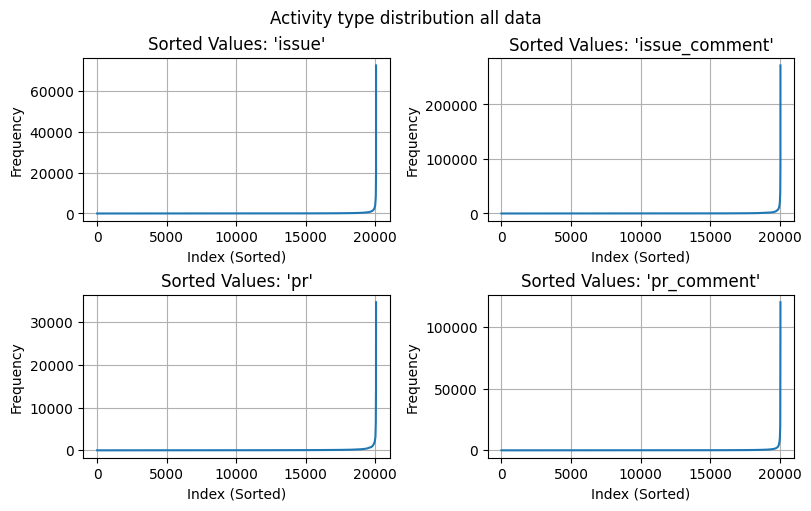

In [187]:
import matplotlib.pyplot as plt


def show(numeric_columns: pd.DataFrame, title: str):

    n_cols = 2
    n_rows = len(numeric_columns.columns) // n_cols

    fig, axes = plt.subplots(
        n_rows, n_cols, figsize=(8, 5), constrained_layout=True)
    axes = axes.flatten()
    fig.suptitle(title)

    for i, column in enumerate(numeric_columns.columns):
        sorted_values = numeric_columns[column].sort_values(
        ).reset_index(drop=True)

        axes[i].plot(sorted_values, label=column)
        axes[i].set_title(f"Sorted Values: '{column}'")
        axes[i].set_xlabel("Index (Sorted)")
        axes[i].set_ylabel("Frequency")
        axes[i].grid(True)

    plt.show()


numeric_columns = proj_activities.select_dtypes(include='number')
show(numeric_columns, "Activity type distribution all data")

col='issue', perc=98, 892.88
col='issue_comment', perc=98, 3334.94
col='pr', perc=98, 690.94
col='pr_comment', perc=98, 1390.96
len(perc_projects)=651


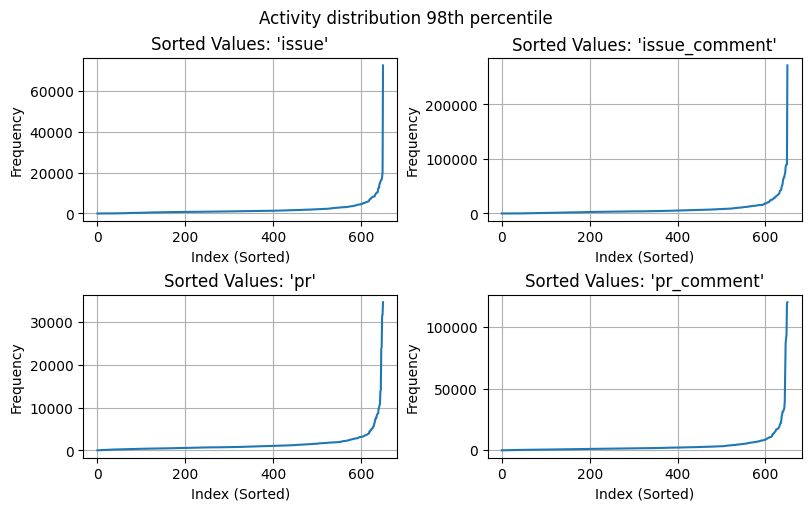

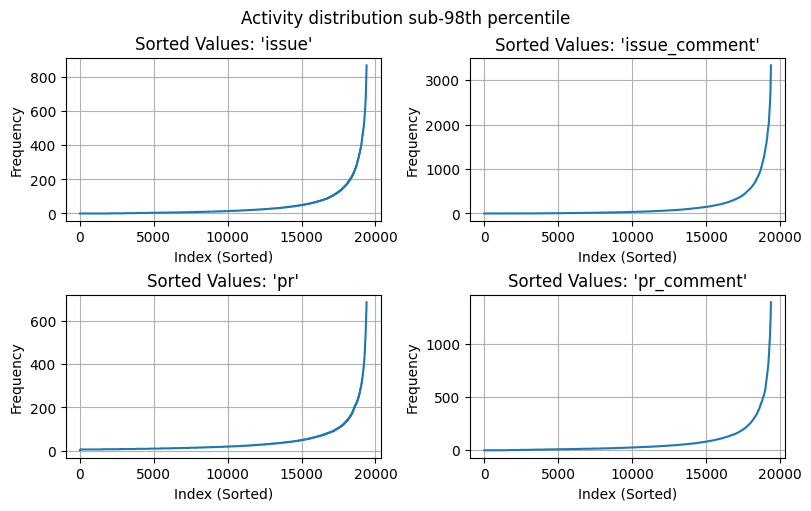

In [188]:
perc_projects = set()
perc = 98
for col in proj_activities.select_dtypes(include='number'):
    my_perc = np.percentile(numeric_columns[col], perc)
    print(f'{col=}, {perc=}, {my_perc:.2f}')
    new_big = proj_activities[proj_activities[col] > my_perc]
    new_big = new_big['Project ID']
    perc_projects.update(new_big)

print(f'{len(perc_projects)=}')

biggest_proj_activities = proj_activities[proj_activities["Project ID"].isin(
    perc_projects)]
smallest_proj_activities = proj_activities[~(
    proj_activities["Project ID"].isin(perc_projects))]

show(biggest_proj_activities.select_dtypes('number'),
     f"Activity distribution {perc}th percentile")
show(smallest_proj_activities.select_dtypes('number'),
     f"Activity distribution sub-{perc}th percentile")

The distributions are all long-tail distributions.
This is unsurprising.
Their curvature is also all pretty much the same when zooming into the sub-98th percentile.

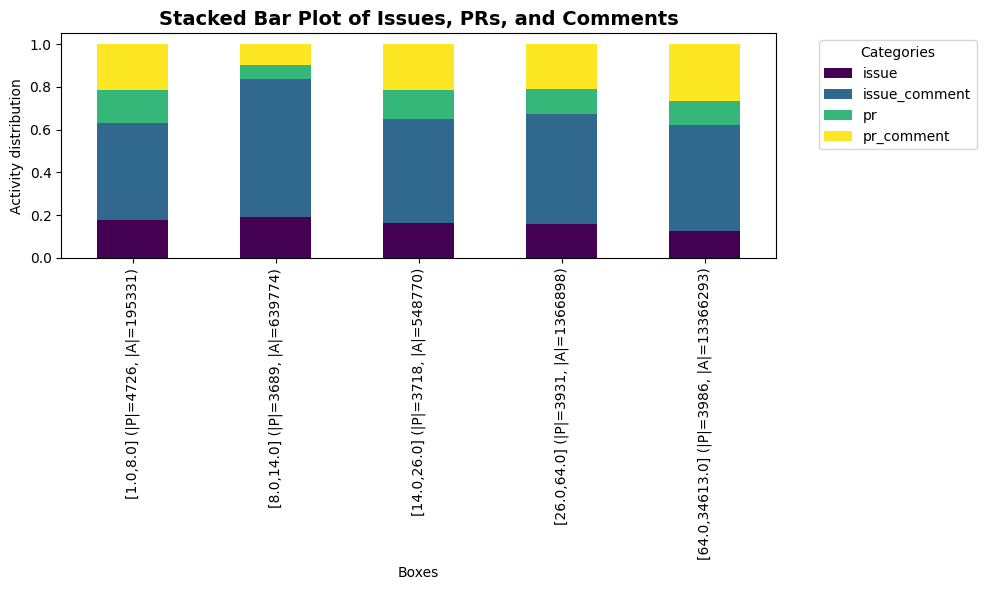

In [ ]:
box_count = 5
boxes = [i/box_count * 100 for i in range(box_count + 1)]

results = list()
box_proj_counts = list()
box_act_counts = list()
percentiles = [-1]


for idx in range(len(boxes) - 1):
    idx_1 = idx + 1

    start_perc = np.percentile(proj_activities['pr'], boxes[idx])
    end_perc = np.percentile(proj_activities['pr'], boxes[idx_1])

    percentiles[idx] = start_perc
    percentiles.append(end_perc)

    box_proj_activities = proj_activities[(
        (proj_activities['pr'] > start_perc) & (proj_activities['pr'] <= end_perc))]
    box_projects = box_proj_activities['Project ID'].unique()

    box_results = box_proj_activities.select_dtypes(include='number').sum()
    act_count = box_results.sum()
    box_act_counts.append(act_count)
    results.append(box_results)
    box_proj_counts.append(len(box_proj_activities))


norm_results = list()
for chi2 in results:
    norm_res = chi2 / chi2.sum()
    norm_results.append(norm_res)

res_df = pd.DataFrame(norm_results)
res_df.index = [
    f"[{percentiles[i]:.1f},{percentiles[i+1]:.1f}] (|P|={box_proj_counts[i]}, |A|={box_act_counts[i]})" for i in range(box_count)]

ax = res_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.title("Stacked Bar Plot of Issues, PRs, and Comments",
          fontsize=14, fontweight="bold")
plt.xlabel("Boxes")
plt.ylabel("Activity distribution")
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()

In [ ]:
from scipy.stats import chisquare

for idx, chi2 in enumerate(results):
    other = None
    for idx2, res2 in enumerate(results):
        if idx == idx2:
            continue
        if other is None:
            other = res2.copy()
        else:
            other += res2

    observed = chi2
    expected = other
    norm_observed = observed / observed.sum()
    norm_expected = expected / expected.sum()
    chi2_stat, chi_p_val = chisquare(norm_observed, norm_expected)
    print(f'Box {idx}: {chi2_stat=:.3f}, {chi_p_val=:.3f}')

Box 0: chi2_stat=0.038, chi_p_val=0.998
Box 1: chi2_stat=0.196, chi_p_val=0.978
Box 2: chi2_stat=0.016, chi_p_val=0.999
Box 3: chi2_stat=0.016, chi_p_val=0.999
Box 4: chi2_stat=0.050, chi_p_val=0.997


Visually there's a difference in the distribution of box 2 repositories with 8 to 14 PRs. However, statistically, the distribution is not different enough.

### Answer

The global distributions of activity types is very similar, such that they all follow a long-tail distribution.
I evaluated the distribution of activity types across smaller and larger projects to identify any differences, and couldn't find any statistically significant differences.

*In other words, the size of the project does not affect the distribution of development activities.*

## Question 3: Qualitative analysis

What are the quentessential PRs for our results?

*The goal here is to find a sample that we can manually analyze for qualitative results.*

In [2]:
import pandas as pd
from pathlib import Path


path2 = Path('../../data/final_data/dataset_transformed.csv').absolute()
df = pd.read_csv(path2)
print(f"{df.shape=}")
df.head()

df.shape=(1216221, 43)


,ID,Project Name,Submitter ID,PR Number,Closed At,PullRequestIsMerged,ControlIntegratedBySameUser,ControlPullRequestHasComments,ControlPullRequestHasCommentByExternalUser,ControlHasHashTagInDescription,...,ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + WeightedEcosystemSecondOrderDegreeCentrality),ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality),ln(1 + EcosystemLinkIntensity),ln(1 + IntraProjectLinkIntensity)
0,166078092,0xProject/0x-monorepo,1141340,352,2018-02-07T00:15:26Z,True,True,True,True,True,...,0.0,0.0,0.089382,0.077533,0.0,0.0,0.012052,0.161812,0.0,0.000000
1,250614858,0xProject/0x-monorepo,4369805,1587,2019-02-06T10:23:21Z,True,False,True,True,True,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.049564,0.0,0.046636
2,320531534,0xProject/0x-monorepo,8582774,2193,2019-10-07T18:29:34Z,False,True,True,True,True,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.083034,0.0,0.000000
3,144650071,0xProject/0x-monorepo,6204356,181,2017-10-05T06:47:55Z,True,True,True,True,False,...,0.0,0.0,0.141667,0.077533,0.0,0.0,0.060473,0.117866,0.0,0.000000
4,235634715,0xProject/0x-monorepo,210914,1371,2018-12-05T01:20:59Z,True,True,True,True,True,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.225033,0.0,0.000000


#### General distributions

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def do_multi_box_plot(df: pd.DataFrame, ignore_zeroes: bool = False):
    meta_columns = ["ID", "Submitter ID", "PR Number"]
    for col in meta_columns:
        if col in df.columns:
            df = df.drop([col], axis=1)
    numeric_columns = df.select_dtypes(include=['number']).columns

    melted_df = df[numeric_columns].melt(
        var_name='Feature', value_name='Value')
    if ignore_zeroes:
        melted_df.replace(0, np.nan, inplace=True)

    # Plot boxplots
    plt.figure(figsize=(10, 10))
    sns.boxplot(data=melted_df, x='Feature', y='Value')
    title = 'Box plots of numeric features'
    if ignore_zeroes:
        title += " (excluding zeroes)"
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

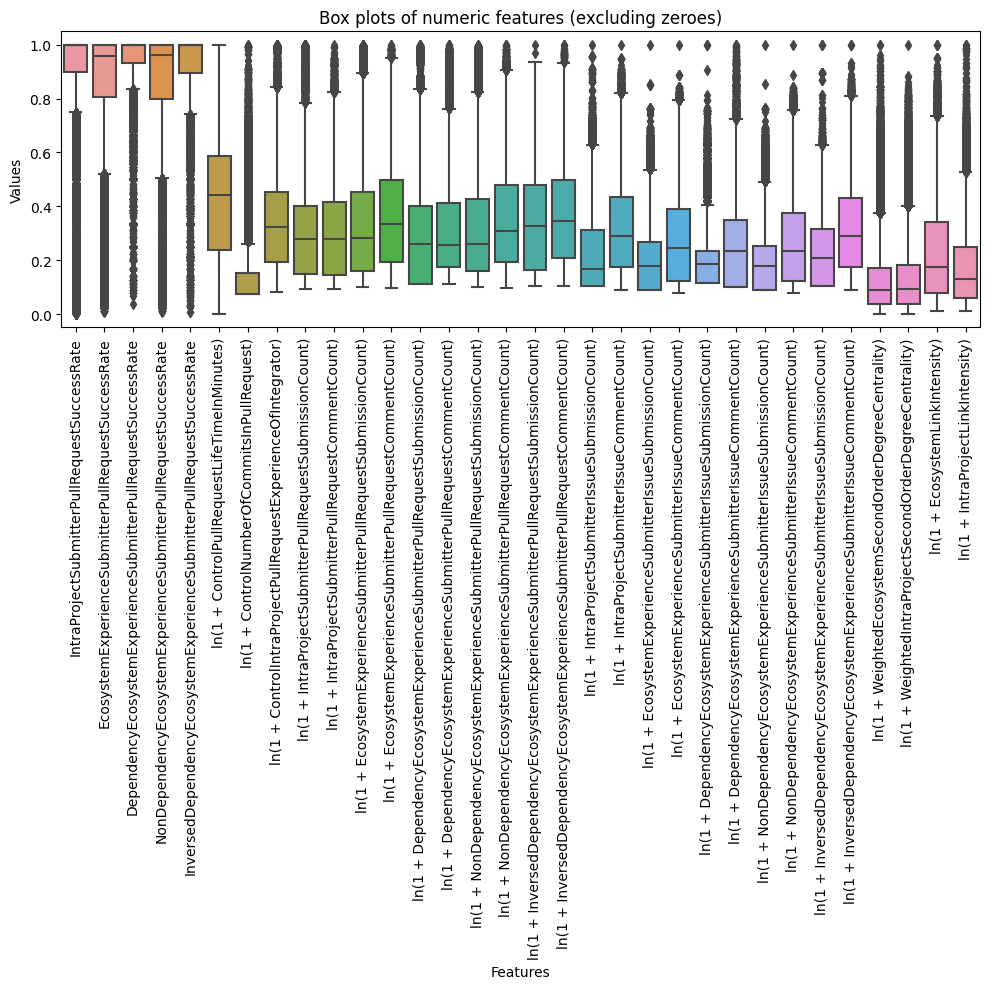

In [2]:
do_multi_box_plot(df, ignore_zeroes=True)

In [4]:
# Doing the same thing again, but after removing outliers using cook's to
# get an intuition about the distribution in the different models.

# Replaces binary values with numeric variants so VIF can be calculated.

import scipy
import statsmodels.api as sm
import numpy as np


def do_mbp_after_cooks(my_df: pd.DataFrame):
    # Binarize features.
    value_mapper = {False: 0, True: 1}
    binary_fields = my_df.select_dtypes(exclude="number")
    for feature in binary_fields:
        my_df.loc[:, feature] = my_df[feature].replace(value_mapper)

    merged_key = "PullRequestIsMerged"
    X_constant = sm.add_constant(my_df.drop([merged_key], axis=1))

    # Use GLM method for logreg here so that we can retrieve the influence measures
    logit_results = sm.GLM(
        my_df[merged_key], X_constant, family=sm.families.Binomial()
    ).fit()

    # Get influence measures
    influence = logit_results.get_influence()

    # Obtain summary df of influence measures
    summ_df = influence.summary_frame()

    # Filter summary df to Cook's distance values only
    diagnosis_df = summ_df[["cooks_d"]]

    # Set Cook's distance threshold
    cook_threshold = 4 / len(my_df)

    # Append absolute standardized residual values
    diagnosis_df.loc[:, "std_resid"] = scipy.stats.zscore(
        logit_results.resid_pearson)
    diagnosis_df.loc[:, "std_resid"] = diagnosis_df["std_resid"].apply(
        lambda x: np.abs(x))

    # Find observations which are BOTH outlier (std dev > 3) and highly influential
    extreme = diagnosis_df[
        (diagnosis_df["cooks_d"] > cook_threshold) & (
            diagnosis_df["std_resid"] > 3)
    ]

    # # Show top 5 highly influential outlier observations
    # extreme.sort_values("cooks_d", ascending=False).head(10)
    my_df = my_df.drop(extreme.index)

    print(f'{len(extreme)=}')

    do_multi_box_plot(my_df, True)
    do_multi_box_plot(my_df, False)

In [3]:
my_col_df = df.copy()
my_col_df = my_col_df.drop(["ID", "Submitter ID", "PR Number",
                            "Project Name", "Closed At"], axis=1)
do_mbp_after_cooks(my_col_df)

/tmp/ipykernel_752/1772537700.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df.loc[:, "std_resid"] = scipy.stats.zscore(


NameError: name 'np' is not defined

In [5]:
from python_proj.utils.util import get_matching


def do_bmp_with_model(df: pd.DataFrame, feat_regex: str, multicollinear_fields: list):
    merged_key = "PullRequestIsMerged"
    independent_fields = [
        col for col in df.columns if col != merged_key]
    dropped_fields = list(get_matching(independent_fields, feat_regex))
    my_df = df.drop(dropped_fields, axis=1)
    independent_fields = [
        field for field in independent_fields if field not in dropped_fields
    ]

    my_df = my_df[independent_fields].drop(multicollinear_fields, axis=1)
    my_df[merged_key] = df[merged_key]
    do_mbp_after_cooks(my_df)
    return my_df

/tmp/ipykernel_3206/703111348.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df.loc[:, "std_resid"] = scipy.stats.zscore(


len(extreme)=23619


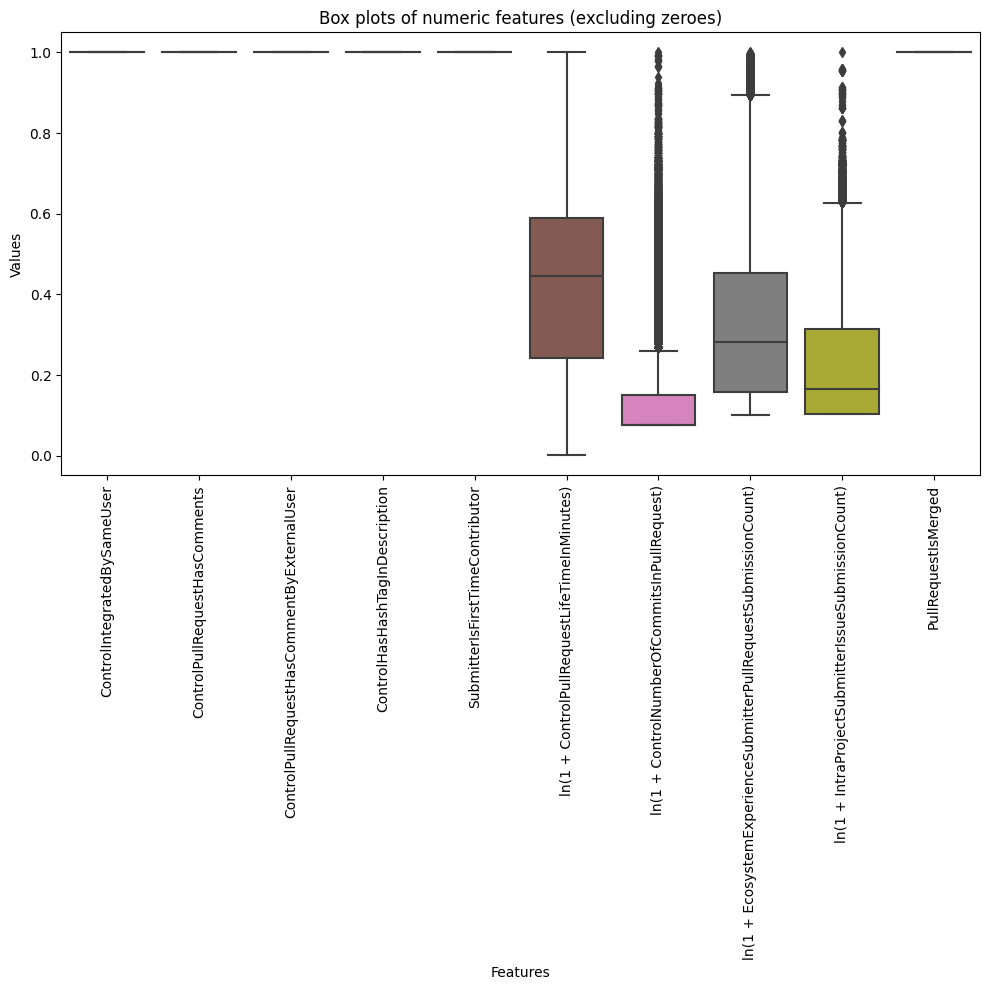

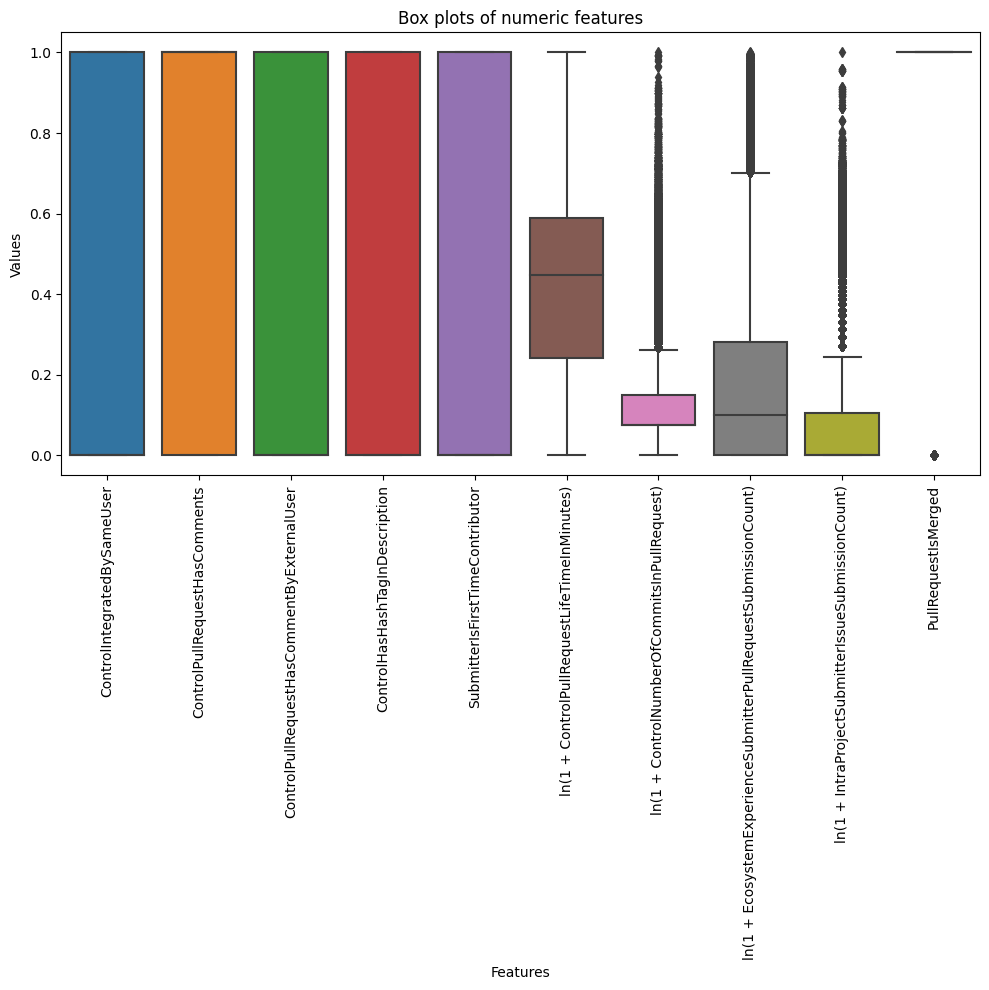

In [6]:
eco_feat_regex = r"(.*(?=Dependency).*|.*Weighted.*|.*LinkIntensity.*)"
eco_multicollinear_fields = [
    # Confounds
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # eco
    "EcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + EcosystemExperienceSubmitterIssueCommentCount)",
    # intra-proj
    # "ln(1 + IntraProjectSubmitterIssueSubmissionCount)",
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "IntraProjectSubmitterPullRequestSuccessRate",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
]
my_eco_df = df.copy()
my_eco_df = my_eco_df.drop(["ID", "Submitter ID", "PR Number",
                            "Project Name", "Closed At"], axis=1)
my_eco_df = do_bmp_with_model(
    my_eco_df, eco_feat_regex, eco_multicollinear_fields)

/tmp/ipykernel_574/1772537700.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df.loc[:, "std_resid"] = scipy.stats.zscore(


len(extreme)=25381


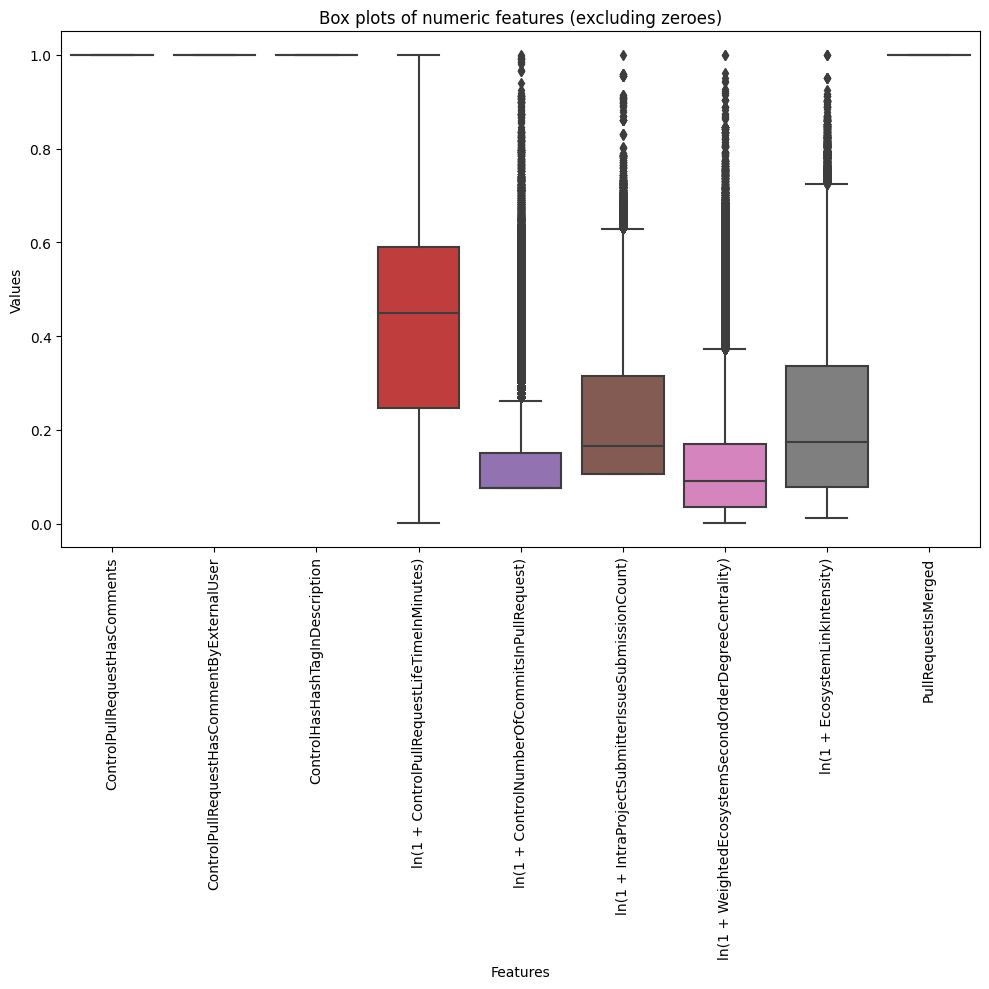

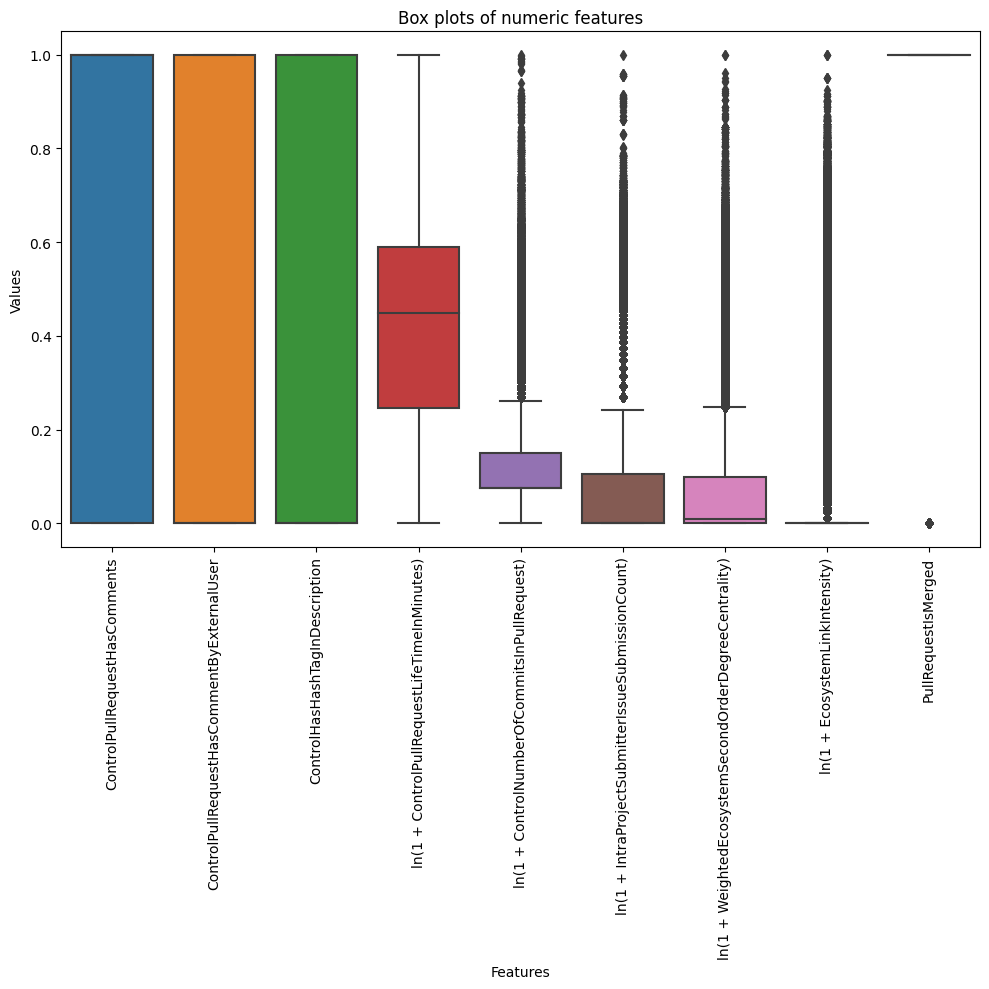

In [9]:
coll_feat_regex = r"^(?!.*(?:LinkIntensity|DegreeCentrality))(?=.*Ecosystem).*"
coll_multicollinear_fields = [
    # Confounding factor
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # Correlating Controls
    # "ControlIntegratedBySameUser",
    # "ControlPullRequestHasComments",
    # Intra link intensity
    "ControlIntegratedBySameUser",
    "ln(1 + IntraProjectLinkIntensity)",
    # Intra experience
    "IntraProjectSubmitterPullRequestSuccessRate",
    "SubmitterIsFirstTimeContributor",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
    # "ln(1 + IntraProjectSubmitterIssueSubmissionCount)",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality)",
]

my_coll_df = df.copy()
my_coll_df = my_coll_df.drop(["ID", "Submitter ID", "PR Number",
                              "Project Name", "Closed At"], axis=1)
my_coll_df = do_bmp_with_model(
    my_coll_df, coll_feat_regex, coll_multicollinear_fields)

In [10]:
dep_feat_regex = r"^(?:(?!Dependency|Control|IntraProject(?!LinkIntensity|SecondOrder)|SubmitterIsFirstTimeContributor).)*$"
dep_multicollinear_fields = [
    # Confounds
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # # dep
    "DependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # Inv. dep
    "InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # non-dep
    "NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # intra-proj
    "IntraProjectSubmitterPullRequestSuccessRate",
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
]

my_dep_df = df.copy()
my_dep_df = my_dep_df.drop(["ID", "Submitter ID", "PR Number",
                            "Project Name", "Closed At"], axis=1)
my_dep_df = do_bmp_with_model(
    my_dep_df, dep_feat_regex, dep_multicollinear_fields)

NameError: name 'do_bmp_with_model' is not defined

From these graphs, it's quite clear what the impact of the zero-inflation is.
When we exclude zeroes from graphs, the different distributions are reasonable.
For the experimental variables, it's mostly interesting to study some PRs from the different quartiles, including the upper outliers (there are no lower outliers).

#### PR sampling

In [13]:
import json
import random


def build_pr_id(row):
    pid = row['Project Name']
    n = row["PR Number"]
    return f'{pid}:{n}'


def get_quartile_prs(my_df: pd.DataFrame, my_dep_df, columns: list):

    quartile_prs = [set() for _ in range(5)]
    for col in columns:
        my_col_df = my_dep_df[my_dep_df[col] > 0]

        q1 = my_col_df[col].quantile(0.25)
        q2 = my_col_df[col].quantile(0.50)
        q3 = my_col_df[col].quantile(0.75)

        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        boxes = [lower_bound, q1, q2, q3, upper_bound, 1]
        # Printing this doesn't work as the values are scaled after the log-transform.
        # real_boxes = [np.exp(z) - 1 for z in boxes]
        # print(f'{real_boxes=}')

        for idx in range(len(boxes) - 1):
            idx2 = idx + 1
            lower = boxes[idx]
            upper = boxes[idx2]

            box_df = my_col_df[((my_col_df[col] > lower) &
                                (my_col_df[col] <= upper))]

            box_df = my_df.loc[box_df.index]
            quartile_prs[idx].update(box_df["PR ID"])

    return quartile_prs


def sample_quartile_prs(quartile_prs):
    samples = list()

    for quartile in quartile_prs:
        sample = min(10, len(quartile))
        smp = random.sample(sorted(quartile), sample)
        samples.append(smp)

    return samples

In [ ]:
random.seed(42)

my_df = df.copy()
my_df.loc[:, ["PR ID"]] = my_df.apply(build_pr_id, axis=1)

eco_cols = [col for col in my_dep_df.columns if "Dependency" in col]
eco_quartile_prs = get_quartile_prs(my_df, my_dep_df, eco_cols)
eco_samples = sample_quartile_prs(eco_quartile_prs)

print(json.dumps(eco_samples, indent=2))

NameError: name 'my_dep_df' is not defined

In [8]:
def sample_prs_to_urls(samples):
    pr_urls = list()

    for prs in samples:
        my_prs = list()
        for pr in prs:
            repo, no = pr.split(":")
            url = f'https://github.com/{repo}/pull/{no}'
            my_prs.append(url)
        pr_urls.append(my_prs)

    return pr_urls

In [9]:
def rewrite_sample_to_csv_friendly_format(samples):
    q = json.dumps(samples, indent=0).replace(
        "[", "").replace(']', "").replace(",", "").replace(" ", "")
    print(q)

In [19]:
eco_pr_urls = sample_prs_to_urls(eco_samples)
print(json.dumps(eco_pr_urls, indent=4))

[
    [
        "https://github.com/petehunt/jsx-loader/pull/47",
        "https://github.com/aframevr/aframe/pull/2772",
        "https://github.com/EdgeApp/edge-core-js/pull/129",
        "https://github.com/serverless/serverless/pull/3220",
        "https://github.com/cytoscape/cytoscape.js-dagre/pull/7",
        "https://github.com/cibernox/ember-power-calendar/pull/106",
        "https://github.com/c4dt/omniledger/pull/19",
        "https://github.com/ant-design/ant-design-mobile/pull/204",
        "https://github.com/segmentio/nightmare/pull/1238",
        "https://github.com/Wykks/ngx-mapbox-gl/pull/151"
    ],
    [
        "https://github.com/vtex/styleguide/pull/43",
        "https://github.com/artsy/reaction/pull/1365",
        "https://github.com/react-component/m-date-picker/pull/56",
        "https://github.com/NodeRedis/redis-commands/pull/1",
        "https://github.com/NativeScript/ios-runtime/pull/957",
        "https://github.com/aurelia/binding/pull/740",
        "h

In [37]:
random.seed(42)

my_df = df.copy()
my_df.loc[:, ["PR ID"]] = my_df.apply(build_pr_id, axis=1)

upstream_dep_cols = [
    col for col in my_dep_df.columns if "Inversed" in col]
print(f'{upstream_dep_cols=}')

up_dep_quartile_prs = get_quartile_prs(my_df, my_dep_df, upstream_dep_cols)
up_dep_samples = sample_quartile_prs(up_dep_quartile_prs)
up_dep_pr_urls = sample_prs_to_urls(up_dep_samples)

up_csv = rewrite_sample_to_csv_friendly_format(up_dep_pr_urls)

upstream_dep_cols=['ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)']


"https://github.com/ckeditor/ckeditor5/pull/907"
"https://github.com/appium/appium-uiautomator2-server/pull/13"
"https://github.com/hparra/gulp-rename/pull/24"
"https://github.com/googleapis/nodejs-googleapis-common/pull/39"
"https://github.com/formio/formio.js/pull/888"
"https://github.com/dependents/node-detective-amd/pull/16"
"https://github.com/civicsource/eslint-config-civicsource/pull/4"
"https://github.com/tediousjs/tedious/pull/945"
"https://github.com/canjs/can-stache/pull/144"
"https://github.com/vaadin/vaadin-grid/pull/983"


"https://github.com/postmanlabs/postman-collection/pull/15"
"https://github.com/asciidoctor/asciidoctor-cli.js/pull/11"
"https://github.com/appium/appium-uiautomator2-server/pull/92"
"https://github.com/canjs/can-define/pull/207"
"https://github.com/emberjs/ember-qunit/pull/575"
"https://github.com/fabric8-ui/ngx-widgets/pull/3"
"https://github.com/s

In [38]:
random.seed(42)

my_df = df.copy()
my_df.loc[:, ["PR ID"]] = my_df.apply(build_pr_id, axis=1)

down_dep_cols = [
    col for col in my_dep_df.columns if "Dependency" in col and "Inversed" not in col and "Non" not in col]
print(f'{down_dep_cols=}')

down_dep_quartile_prs = get_quartile_prs(my_df, my_dep_df, down_dep_cols)
down_dep_samples = sample_quartile_prs(down_dep_quartile_prs)
down_dep_pr_urls = sample_prs_to_urls(down_dep_samples)

up_csv = rewrite_sample_to_csv_friendly_format(down_dep_pr_urls)

down_dep_cols=['ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)']


"https://github.com/ckeditor/ckeditor5-theme-lark/pull/216"
"https://github.com/apache/cordova-ios/pull/501"
"https://github.com/kwonoj/hunspell-asm/pull/184"
"https://github.com/intljusticemission/react-big-calendar/pull/671"
"https://github.com/groupon/selenium-download/pull/1"
"https://github.com/donejs/generator-donejs/pull/171"
"https://github.com/cgewecke/eth-gas-reporter/pull/134"
"https://github.com/zoobestik/csso-webpack-plugin/pull/8"
"https://github.com/c4dt/omniledger/pull/161"
"https://github.com/sinonjs/sinon/pull/454"


"https://github.com/appium/appium-adb/pull/313"
"https://github.com/apostrophecms/apostrophe/pull/1404"
"https://github.com/browserslist/browserslist-useragent-regexp/pull/20"
"https://github.com/gemini-testing/gemini/pull/531"
"https://github.com/googleapis/cloud-trace-nodejs/pull/610"
"https://github.com/tensorflow/tfjs/pull/2262"
"https://github.com/apifytech/a

In [25]:
# Test how many of the original sample are upstream and downstream relevant.

up_quartile_counts = [0] * len(eco_samples)
down_quartile_counts = [0] * len(eco_samples)

for idx, quartile in enumerate(eco_samples):
    for pr in quartile:
        if pr in up_dep_quartile_prs[idx]:
            up_quartile_counts[idx] += 1
        if pr in down_dep_quartile_prs[idx]:
            down_quartile_counts[idx] += 1

up_quartile_counts = [a / len(b)
                      for a, b in zip(up_quartile_counts, eco_samples)]
down_quartile_counts = [a / len(b)
                        for a, b in zip(down_quartile_counts, eco_samples)]

print(up_quartile_counts, down_quartile_counts)

[0.0, 0.0, 0.0, 0.1, 0.0] [0.1, 0.1, 0.1, 0.3, 0.1]


In other words, the general sample was not representative for upstream and downstream dependencies at all.
These should be analyzed separately; I created these samples above already. 

In [16]:
random.seed(42)

my_df = df.copy()
my_df.loc[:, ["PR ID"]] = my_df.apply(build_pr_id, axis=1)

coll_cols = [
    col for col in my_coll_df.columns if "Link" in col]
print(f'{coll_cols=}')

coll_quartile_prs = get_quartile_prs(my_df, my_coll_df, coll_cols)
coll_samples = sample_quartile_prs(coll_quartile_prs)
coll_pr_urls = sample_prs_to_urls(coll_samples)

up_csv = rewrite_sample_to_csv_friendly_format(coll_pr_urls)

coll_cols=['ln(1 + EcosystemLinkIntensity)']


"https://github.com/patternfly/patternfly-next/pull/2542"
"https://github.com/TryGhost/Ghost-CLI/pull/633"
"https://github.com/DevExpress/testcafe/pull/1783"
"https://github.com/simplabs/ember-simple-auth/pull/1545"
"https://github.com/choojs/nanohtml/pull/147"
"https://github.com/brunch/brunch/pull/928"
"https://github.com/benjamn/reify/pull/83"
"https://github.com/angular/angular/pull/21562"
"https://github.com/serverless/serverless/pull/4058"
"https://github.com/Sage/carbon/pull/763"


"https://github.com/quasarframework/quasar/pull/2213"
"https://github.com/sindresorhus/iterm2-version/pull/6"
"https://github.com/zalmoxisus/redux-devtools-extension/pull/399"
"https://github.com/lundegaard/react-union/pull/63"
"https://github.com/ReactTraining/react-router/pull/4798"
"https://github.com/multiformats/js-multihash/pull/21"
"https://github.com/fusionjs/fusionjs/pull/161"
"https://github.com/FirebaseExtended/firebase-queue/pull/54"
"https://

In [17]:
random.seed(42)

my_df = df.copy()
my_df.loc[:, ["PR ID"]] = my_df.apply(build_pr_id, axis=1)

coll_cols = [
    col for col in my_coll_df.columns if "SecondOrder" in col]
print(f'{coll_cols=}')

coll_quartile_prs = get_quartile_prs(my_df, my_coll_df, coll_cols)
coll_samples = sample_quartile_prs(coll_quartile_prs)
coll_pr_urls = sample_prs_to_urls(coll_samples)

up_csv = rewrite_sample_to_csv_friendly_format(coll_pr_urls)

coll_cols=['ln(1 + WeightedEcosystemSecondOrderDegreeCentrality)']


"https://github.com/angeloashmore/gatsby-source-prismic/pull/76"
"https://github.com/Eonasdan/bootstrap-datetimepicker/pull/1687"
"https://github.com/garris/BackstopJS/pull/29"
"https://github.com/estools/escodegen/pull/82"
"https://github.com/dooboolab/react-native-iap/pull/716"
"https://github.com/arlac77/npm-template-sync/pull/654"
"https://github.com/alampros/react-confetti/pull/51"
"https://github.com/t49tran/react-google-recaptcha-v3/pull/3"
"https://github.com/TypeStrong/ts-loader/pull/774"
"https://github.com/vuejs/vue-loader/pull/964"


"https://github.com/nojvek/noice-json-rpc/pull/1"
"https://github.com/IBM-Cloud/gp-js-client/pull/31"
"https://github.com/GoogleChromeLabs/preload-webpack-plugin/pull/82"
"https://github.com/airbnb/lottie-ios/pull/191"
"https://github.com/doczjs/docz/pull/1107"
"https://github.com/electron/apps/pull/339"
"https://github.com/semantic-release/semantic-release/pull/3"
"https://gi

In [14]:
random.seed(42)

my_df = df.copy()
my_df.loc[:, ["PR ID"]] = my_df.apply(build_pr_id, axis=1)

intra_cols = [
    col for col in my_eco_df.columns if "Intra" in col]
print(f'{intra_cols=}')

intra_quartile_prs = get_quartile_prs(my_df, my_df, intra_cols)
intra_samples = sample_quartile_prs(intra_quartile_prs)
intra_pr_urls = sample_prs_to_urls(intra_samples)

up_csv = rewrite_sample_to_csv_friendly_format(intra_pr_urls)

intra_cols=['ln(1 + IntraProjectSubmitterIssueSubmissionCount)']


"https://github.com/atomist/cli/pull/119"
"https://github.com/Fyrd/caniuse/pull/2344"
"https://github.com/jshint/jshint/pull/3222"
"https://github.com/hourliert/redux-crud-observable/pull/13"
"https://github.com/ghooks-org/ghooks/pull/109"
"https://github.com/callstack/react-native-paper/pull/435"
"https://github.com/apifytech/apify-js/pull/73"
"https://github.com/almende/vis/pull/2802"
"https://github.com/shelljs/shelljs/pull/214"
"https://github.com/KaTeX/KaTeX/pull/2008"


"https://github.com/Dash-Industry-Forum/dash.js/pull/1684"
"https://github.com/OpenZeppelin/openzeppelin-contracts/pull/680"
"https://github.com/bcoin-org/bcoin/pull/904"
"https://github.com/bootstrap-vue/bootstrap-vue/pull/2294"
"https://github.com/mansona/ember-cli-notifications/pull/109"
"https://github.com/palantir/plottable/pull/3049"
"https://github.com/Codeception/CodeceptJS/pull/1847"
"https://github.com/nestjs/terminus/pull/26"
"https://gi

#### Newcomer PR sampling


In [33]:
import random


def take_sample_for_qualititative_study(df, feat_regex, multicollinear_fields, cols_of_interest, seed=42):
    random.seed(seed)

    my_var_df = df.copy()
    my_var_df = my_var_df.drop(["ID", "Submitter ID", "PR Number",
                                "Project Name", "Closed At"], axis=1)
    my_var_df = do_bmp_with_model(
        my_var_df, feat_regex, multicollinear_fields)

    my_df = df.copy()
    my_df.loc[:, ["PR ID"]] = my_df.apply(build_pr_id, axis=1)

    print(f'{cols_of_interest=}')

    quartile_prs = get_quartile_prs(my_df, my_var_df, cols_of_interest)
    samples = sample_quartile_prs(quartile_prs)
    pr_urls = sample_prs_to_urls(samples)

    url_csv = rewrite_sample_to_csv_friendly_format(pr_urls)
    return url_csv

In [54]:
df = df[df['SubmitterIsFirstTimeContributor']]
df = df.drop([
    'SubmitterIsFirstTimeContributor',
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "IntraProjectSubmitterPullRequestSuccessRate"
], axis=1)
df.head()

,ID,Project Name,Submitter ID,PR Number,Closed At,PullRequestIsMerged,ControlIntegratedBySameUser,ControlPullRequestHasComments,ControlPullRequestHasCommentByExternalUser,ControlHasHashTagInDescription,...,ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + WeightedEcosystemSecondOrderDegreeCentrality),ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality),ln(1 + EcosystemLinkIntensity),ln(1 + IntraProjectLinkIntensity)
50,221001418,0xProject/0x-monorepo,517215,1121,2018-10-09T06:50:22Z,True,False,True,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,188265963,0xProject/0x-monorepo,3066135,592,2018-05-15T22:59:24Z,True,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,162236523,0xProject/0x-monorepo,4940935,313,2018-01-10T22:27:05Z,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,223362967,0xProject/0x-monorepo,321856,1141,2019-03-01T14:08:27Z,False,False,True,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,232156224,0xProject/0x-monorepo,10660594,1288,2018-11-27T00:45:00Z,True,False,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Contribution variables

In [66]:
%matplotlib agg

dep_feat_regex = r"^(?:(?!Dependency|Control|IntraProject(?!LinkIntensity|SecondOrder)|SubmitterIsFirstTimeContributor).)*$"
# Standardized list of multicollinear fields.
# Standardized list of multicollinear fields.
dep_multicollinear_fields = [
    # Confounds
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # "ln(1 + ControlNumberOfCommitsInPullRequest)",
    # # dep
    "DependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # Inv. dep
    "InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # non-dep
    "NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # intra-proj
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
]
upstream_dep_cols = [col for col in df.columns if "Inversed" in col and not col in dep_multicollinear_fields]

take_sample_for_qualititative_study(
    df, dep_feat_regex, dep_multicollinear_fields, upstream_dep_cols)

/tmp/ipykernel_636/1772537700.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df.loc[:, "std_resid"] = scipy.stats.zscore(


len(extreme)=4437
(426832, 41) (426832, 11)
Index([     50,      59,     137,     202,     228,     279,     302,     346,
           382,     385,
       ...
       1216209, 1216210, 1216211, 1216212, 1216214, 1216215, 1216217, 1216218,
       1216219, 1216220],
      dtype='int64', length=426832) Index([     50,      59,     137,     202,     228,     279,     302,     346,
           382,     385,
       ...
       1216209, 1216210, 1216211, 1216212, 1216214, 1216215, 1216217, 1216218,
       1216219, 1216220],
      dtype='int64', length=426832)
cols_of_interest=['ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)']


"https://github.com/requirejs/r.js/pull/671"
"https://github.com/builtcrew/vdom-to-html/pull/23"
"https://github.com/apache/cordova-plugman/pull/82"
"https://github.com/sindresorhus/yn/pull/7"
"https://github.com/enb/mock-enb/pull/3"
"https://github.com/ember-cli/ember-cli-inject-live-reload/pull/86"
"https://github.com/eggjs/egg-jsonp/pu

In [69]:
%matplotlib agg

down_dep_cols = [
    col for col in df.columns if "Dependency" in col and "Inversed" not in col and "Non" not in col and col not in dep_multicollinear_fields]

take_sample_for_qualititative_study(
    df, dep_feat_regex, dep_multicollinear_fields, down_dep_cols)

/tmp/ipykernel_636/1772537700.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df.loc[:, "std_resid"] = scipy.stats.zscore(


len(extreme)=4437
(426832, 41) (426832, 11)
Index([     50,      59,     137,     202,     228,     279,     302,     346,
           382,     385,
       ...
       1216209, 1216210, 1216211, 1216212, 1216214, 1216215, 1216217, 1216218,
       1216219, 1216220],
      dtype='int64', length=426832) Index([     50,      59,     137,     202,     228,     279,     302,     346,
           382,     385,
       ...
       1216209, 1216210, 1216211, 1216212, 1216214, 1216215, 1216217, 1216218,
       1216219, 1216220],
      dtype='int64', length=426832)
cols_of_interest=['ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)']


"https://github.com/vaadin/vaadin-checkbox/pull/57"
"https://github.com/canjs/can-simple-observable/pull/42"
"https://github.com/apache/cordova-lib/pull/610"
"https://github.com/gruntjs/grunt-contrib-nodeunit/pull/7"
"https://github.com/fmal/gulp-inline-source/pull/18"
"https://github.com/fabric8-ui/fabric8-recommender/pull/315"
"https://github.c

In [71]:
%matplotlib agg

eco_cols = [col for col in df.columns if "Dependency" in col and col not in dep_multicollinear_fields]

take_sample_for_qualititative_study(
    df, dep_feat_regex, dep_multicollinear_fields, eco_cols)

/tmp/ipykernel_636/1772537700.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df.loc[:, "std_resid"] = scipy.stats.zscore(


len(extreme)=4437
(426832, 41) (426832, 11)
Index([     50,      59,     137,     202,     228,     279,     302,     346,
           382,     385,
       ...
       1216209, 1216210, 1216211, 1216212, 1216214, 1216215, 1216217, 1216218,
       1216219, 1216220],
      dtype='int64', length=426832) Index([     50,      59,     137,     202,     228,     279,     302,     346,
           382,     385,
       ...
       1216209, 1216210, 1216211, 1216212, 1216214, 1216215, 1216217, 1216218,
       1216219, 1216220],
      dtype='int64', length=426832)
cols_of_interest=['ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)']


"https://github.com/react-native-community/react-native-camera/pull/311"
"https://github.com/almende/vis/pull/2980"
"https://github.com/ForbesLindesay/throat/pull/14"
"https://github.co

##### Collab variables

In [62]:
%matplotlib agg

random.seed(42)

coll_feat_regex = r"^(?!.*(?:LinkIntensity|DegreeCentrality))(?=.*Ecosystem).*"
# Standardized list of multicollinear fields.
coll_multicollinear_fields = [
    # Confounds results
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # not applicable (this correlates by definition of link intensity)
    "ControlIntegratedBySameUser",
    # Intra project experience
    # "ln(1 + IntraProjectSubmitterIssueSubmissionCount)",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality)",
    "ln(1 + IntraProjectLinkIntensity)",
]
coll_cols = [
    col for col in df.columns if "SecondOrder" in col and "Ecosystem" in col and not "IntraProjectSubmitterPullRequest" in col]

take_sample_for_qualititative_study(
    df, coll_feat_regex, coll_multicollinear_fields, coll_cols)

/tmp/ipykernel_636/1772537700.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df.loc[:, "std_resid"] = scipy.stats.zscore(


len(extreme)=460
(426832, 41) (426832, 9)
Index([     50,      59,     137,     202,     228,     279,     302,     346,
           382,     385,
       ...
       1216209, 1216210, 1216211, 1216212, 1216214, 1216215, 1216217, 1216218,
       1216219, 1216220],
      dtype='int64', length=426832) Index([     50,      59,     137,     202,     228,     279,     302,     346,
           382,     385,
       ...
       1216209, 1216210, 1216211, 1216212, 1216214, 1216215, 1216217, 1216218,
       1216219, 1216220],
      dtype='int64', length=426832)
cols_of_interest=['ln(1 + WeightedEcosystemSecondOrderDegreeCentrality)']


"https://github.com/thlorenz/proxyquire/pull/18"
"https://github.com/andrewplummer/Sugar/pull/480"
"https://github.com/Financial-Times/o-viewport/pull/23"
"https://github.com/flatiron/resourceful/pull/98"
"https://github.com/ember-cli/ember-resolver/pull/301"
"https://github.com/dkfbasel/vuex-i18n/pull/1"
"https://github.com/atom/season/pull/21"
"https://github.com/ak

In [63]:
%matplotlib agg

random.seed(42)

coll_feat_regex = r"^(?!.*(?:LinkIntensity|DegreeCentrality))(?=.*Ecosystem).*"
# Standardized list of multicollinear fields.
coll_multicollinear_fields = [
    # Confounds results
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # not applicable (this correlates by definition of link intensity)
    "ControlIntegratedBySameUser",
    # Intra project experience
    # "ln(1 + IntraProjectSubmitterIssueSubmissionCount)",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality)",
    "ln(1 + IntraProjectLinkIntensity)",
]
coll_cols = [
    col for col in df.columns if "LinkIntensity" in col and "Ecosystem" in col]

take_sample_for_qualititative_study(
    df, coll_feat_regex, coll_multicollinear_fields, coll_cols)

/tmp/ipykernel_636/1772537700.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df.loc[:, "std_resid"] = scipy.stats.zscore(


len(extreme)=460
(426832, 41) (426832, 9)
Index([     50,      59,     137,     202,     228,     279,     302,     346,
           382,     385,
       ...
       1216209, 1216210, 1216211, 1216212, 1216214, 1216215, 1216217, 1216218,
       1216219, 1216220],
      dtype='int64', length=426832) Index([     50,      59,     137,     202,     228,     279,     302,     346,
           382,     385,
       ...
       1216209, 1216210, 1216211, 1216212, 1216214, 1216215, 1216217, 1216218,
       1216219, 1216220],
      dtype='int64', length=426832)
cols_of_interest=['ln(1 + EcosystemLinkIntensity)']


"https://github.com/protobufjs/bytebuffer.js/pull/68"
"https://github.com/amqp/rhea-promise/pull/36"
"https://github.com/GoogleChrome/chrome-launcher/pull/27"
"https://github.com/sindresorhus/npm-name/pull/36"
"https://github.com/discordjs/Commando/pull/50"
"https://github.com/colynb/gulp-swig/pull/3"
"https://github.com/canjs/can-view-parser/pull/96"
"https://github.com/apache/incubator-e

### Follow-up analysis I: Contributions and number of references

The first step of a the qualitative analysis.

#### Setup

In [14]:
import pandas as pd
path = "../../data/follow-up/Qualitative sample.xlsx"

df = pd.read_excel(path, header=0, sheet_name='All PRs')

df.describe()

,Unnamed: 19,Unnamed: 20
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [15]:
# Replace code tags with binary values.
meta_columns = ["general/new", "sample", "quartile", "url", "notes"]
data_columns = [col for col in df.columns if col not in meta_columns]

df[data_columns] = df[data_columns].fillna(0).replace("x", 1)

df = df.drop(['notes'], axis=1)
unnamed_cols = [col for col in df.columns if "Unnamed" in col]
df = df.drop(unnamed_cols, axis=1)
print(df.shape)
df.head()

(542, 18)


,general/new,sample,quartile,url,minor change,docs,test,feature/visual,bug,improvement,dependency,CI pipeline,other config,process change,little/no discussion,more discussion,has related intra activity,has related extra activity
0,general,intra,first,https://github.com/atomist/cli/pull/119,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,general,intra,first,https://github.com/Fyrd/caniuse/pull/2344,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,general,intra,first,https://github.com/jshint/jshint/pull/3222,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,general,intra,first,https://github.com/hourliert/redux-crud-observ...,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,general,intra,first,https://github.com/ghooks-org/ghooks/pull/109,0,0,0,0,0,1,0,0,0,0,0,1,1,1


In [16]:
cols = ["minor change", "docs", "test", "feature/visual", "bug", "improvement", "dependency", "CI pipeline", "other config",
       "process change", "little/no discussion", "more discussion", "has related intra activity", "has related extra activity"]

unlabeled = df[df[cols].sum(axis=1) == 0]
print(f'Dropping {len(unlabeled)} rows because they are unlabeled')
df = df.drop(unlabeled.index)
print(f'{df.shape=}')

Dropping 4 rows because they are unlabeled
df.shape=(538, 18)


In [38]:
res = df[cols].sum()
res

content = ["docs", "test", "feature/visual", "bug", "improvement"]
meta = ["dependency", "CI pipeline", "other config",
       "process change"]

res_content = res[content].sum()
res_content

res_meta = res[meta].sum()
res_meta

q = df[((df[content].max(axis=1) == 1) & (df[meta].max(axis=1) == 1))]
q.shape

(15, 18)

#### External references per Experience Quartiles

*Do PRs submitted by people with more ecosystem experience reference external activities more frequently than people with less ecosystem experience? Ditto for meta/content tasks.*

##### Setup

In [17]:
# NOTE: These have to be grouped, as the specific labels are not very well cleaned up,
# however, the aggregated clusters are.

content_contributions = ["docs", "test",
                         "feature/visual", "bug", "improvement"]
meta_contributions = ["CI pipeline", "other config", "process change", "dependency"]
quartiles = ['first', 'second', 'third', 'fourth', 'outlier']

# Calculates content/meta contributions
exp_df = df.copy()
exp_df['content contributions'] = exp_df[content_contributions].max(axis=1)
exp_df = exp_df.drop(content_contributions, axis=1)
exp_df['meta contributions'] = exp_df[meta_contributions].max(axis=1)
exp_df = exp_df.drop(meta_contributions, axis=1)

# Splits quartiles into bottom/top.
quart_map = {'first': 'bottom', 'second': 'bottom',
             'third': "top", 'fourth': "top"}
exp_df['quartile'] = exp_df['quartile'].replace(quart_map)

# Drops irrelevant fields
exp_df = exp_df.drop(['minor change', 'little/no discussion',
                     'more discussion', 'has related intra activity'], axis=1)

# # Splits dataset.
# df_intra = exp_df[exp_df['sample'] == 'intra']
# df_intra = df_intra.groupby(['quartile'])
# df_non_intra = exp_df[exp_df['sample'] != 'intra']
# df_non_intra = df_non_intra.groupby(['general/new', 'sample', 'quartile'])


# df_intra.describe()
# df_non_intra.describe()

##### External references

For none of the measured experience levels do the upper two quartiles (excluding outliers) reference ecosystem activities more commonly compared to the bottom two quartiles. Outliers do not seem to behave differently from the non-outliers. Out of curiosity, I tested this for bottom vs. top+outliers as well, which does yield some results. However, I don't know what this would mean (yet).

In [18]:
from wmutils.collections.safe_dict import SafeDict
import itertools
from scipy.stats import fisher_exact

def compare_binary_distribution_for_non_outliers_and_outliers(feature_key):
    exp_df_out = exp_df.copy()
    exp_df_out['quartile'] = exp_df_out['quartile'].replace(
        {'bottom': 'bottom+top', 'top': 'bottom+top'})
    exp_df_out = exp_df_out.groupby(['general/new', 'sample', 'quartile'])
    exp_df_out_vc = exp_df_out[feature_key].value_counts()
    exp_df_out_vc = SafeDict(initial_mapping=exp_df_out_vc.items(),
                             default_value=0)

    dim_a = ['general', 'newcomer']
    dim_b = ['downstream', 'upstream', 'ecosystem',
             'intra', 'link strength', 'so-degree']

    for a, b in itertools.product(dim_a, dim_b):
        if a == 'newcomer' and b == 'intra':
            continue
        q = exp_df_out_vc[(a, b, 'bottom+top', 0)]
        r = exp_df_out_vc[(a, b, 'bottom+top', 1)]
        s = exp_df_out_vc[(a, b, 'outlier', 0)]
        t = exp_df_out_vc[(a, b, 'outlier', 1)]

        table = [[r + 1, q + 1], [t + 1, s + 1]]
        # print(table)
        odds_ratio, p_value = fisher_exact(table, alternative="two-sided")
        significant = p_value < 0.05

        key = "({})".format(",".join([a, b]))
        print(f'{key}: {odds_ratio=:.3f} ({p_value=:.3f}, {significant=})')

    # exp_df_out_vc


compare_binary_distribution_for_non_outliers_and_outliers(
    'has related extra activity')

(general,downstream): odds_ratio=1.528 (p_value=1.000, significant=False)
(general,upstream): odds_ratio=0.938 (p_value=1.000, significant=False)
(general,ecosystem): odds_ratio=3.000 (p_value=0.426, significant=False)
(general,intra): odds_ratio=1.833 (p_value=0.707, significant=False)
(general,link strength): odds_ratio=0.625 (p_value=0.485, significant=False)
(general,so-degree): odds_ratio=0.938 (p_value=1.000, significant=False)
(newcomer,downstream): odds_ratio=1.774 (p_value=0.708, significant=False)
(newcomer,upstream): odds_ratio=2.069 (p_value=0.480, significant=False)
(newcomer,ecosystem): odds_ratio=1.241 (p_value=1.000, significant=False)
(newcomer,link strength): odds_ratio=0.818 (p_value=1.000, significant=False)
(newcomer,so-degree): odds_ratio=0.471 (p_value=0.431, significant=False)


In [19]:
from wmutils.collections.safe_dict import SafeDict


def compare_binary_distribution_for_low_and_upper_quartile(feature_key):
    exp_df_no_out = exp_df[exp_df['quartile'] != 'outlier']
    exp_df_no_out = exp_df_no_out.groupby(
        ['general/new', 'sample', 'quartile'])
    exp_df_no_out_vc = exp_df_no_out[feature_key].value_counts()
    exp_df_no_out_vc = SafeDict(
        initial_mapping=exp_df_no_out_vc.items(), default_value=0)

    dim_a = ['general', 'newcomer']
    dim_b = ['downstream', 'upstream', 'ecosystem',
             'intra', 'link strength', 'so-degree']

    for a, b in itertools.product(dim_a, dim_b):
        if a == 'newcomer' and b == 'intra':
            continue
        q = exp_df_no_out_vc[(a, b, 'bottom', 0)]
        r = exp_df_no_out_vc[(a, b, 'bottom', 1)]
        s = exp_df_no_out_vc[(a, b, 'top', 0)]
        t = exp_df_no_out_vc[(a, b, 'top', 1)]

        table = [[r + 1, q + 1], [t + 1, s + 1]]
        odds_ratio, p_value = fisher_exact(table, alternative="two-sided")
        significant = p_value < 0.05

        key = "({})".format(",".join([a, b]))
        print(f'{key}: {odds_ratio=:.3f} ({p_value=:.3f}, {significant=})')


compare_binary_distribution_for_low_and_upper_quartile(
    feature_key='has related extra activity')

(general,downstream): odds_ratio=2.353 (p_value=0.412, significant=False)
(general,upstream): odds_ratio=0.476 (p_value=0.488, significant=False)
(general,ecosystem): odds_ratio=2.956 (p_value=0.281, significant=False)
(general,intra): odds_ratio=2.429 (p_value=0.310, significant=False)
(general,link strength): odds_ratio=0.476 (p_value=0.488, significant=False)
(general,so-degree): odds_ratio=0.784 (p_value=1.000, significant=False)
(newcomer,downstream): odds_ratio=1.000 (p_value=1.000, significant=False)
(newcomer,upstream): odds_ratio=2.942 (p_value=0.185, significant=False)
(newcomer,ecosystem): odds_ratio=0.340 (p_value=0.185, significant=False)
(newcomer,link strength): odds_ratio=1.000 (p_value=1.000, significant=False)
(newcomer,so-degree): odds_ratio=0.214 (p_value=0.132, significant=False)


In [21]:
from wmutils.collections.safe_dict import SafeDict

def compare_binary_distribution_for_bottom_and_top_plus_outliers(feature_key):
    exp_df_out = exp_df.copy()
    exp_df_out['quartile'] = exp_df_out['quartile'].replace(
        {'top': 'top+outlier', 'outlier': 'top+outlier'})
    exp_df_out = exp_df_out.groupby(['general/new', 'sample', 'quartile'])
    exp_df_out_vc = exp_df_out[feature_key].value_counts()
    exp_df_out_vc = SafeDict(initial_mapping=exp_df_out_vc.items(),
                            default_value=0)

    dim_a = ['general', 'newcomer']
    dim_b = ['downstream', 'upstream', 'ecosystem',
            'intra', 'link strength', 'so-degree']

    for a, b in itertools.product(dim_a, dim_b):
        if a == 'newcomer' and b == 'intra':
            continue
        q = exp_df_out_vc[(a, b, 'bottom', 0)]
        r = exp_df_out_vc[(a, b, 'bottom', 1)]
        s = exp_df_out_vc[(a, b, 'top+outlier', 0)]
        t = exp_df_out_vc[(a, b, 'top+outlier', 1)]

        table = [[r + 1, q + 1], [t + 1, s + 1]]
        # print(table)
        odds_ratio, p_value = fisher_exact(table, alternative="two-sided")
        significant = p_value < 0.05

        key = "({})".format(",".join([a, b]))
        print(f'{key}: {odds_ratio=:.3f} ({p_value=:.3f}, {significant=})')

    # exp_df_out_vc

compare_binary_distribution_for_bottom_and_top_plus_outliers(feature_key='has related extra activity')

(general,downstream): odds_ratio=3.529 (p_value=0.200, significant=False)
(general,upstream): odds_ratio=0.540 (p_value=0.497, significant=False)
(general,ecosystem): odds_ratio=4.511 (p_value=0.071, significant=False)
(general,intra): odds_ratio=2.971 (p_value=0.114, significant=False)
(general,link strength): odds_ratio=0.489 (p_value=0.354, significant=False)
(general,so-degree): odds_ratio=0.882 (p_value=1.000, significant=False)
(newcomer,downstream): odds_ratio=1.339 (p_value=0.750, significant=False)
(newcomer,upstream): odds_ratio=3.600 (p_value=0.061, significant=False)
(newcomer,ecosystem): odds_ratio=0.449 (p_value=0.351, significant=False)
(newcomer,link strength): odds_ratio=1.050 (p_value=1.000, significant=False)
(newcomer,so-degree): odds_ratio=0.220 (p_value=0.094, significant=False)


##### Content vs. meta tasks

We see that
- **Bottom vs top:** people with low intra experience are more likely to make content contributions.
- **Non-outliers vs. outliers:** people who are not outliers in terms of 1) downstream and 2) general ecosystem experience are much more likely to make content contributions.
- **Bottom vs. top + outliers:** people with less downstream, upstream, general ecosystem, intra experience are more likely to submit content contributions.

For meta contributions we see the inverse of these results, with the only exception being that people with lower 1) general ecosystem experience and 2) intra-project experience do not necessarily make more meta contributions.


In [22]:
print("Bottom vs. top")
compare_binary_distribution_for_low_and_upper_quartile(feature_key='content contributions')
print()

print("Non-outliers vs. outliers")
compare_binary_distribution_for_non_outliers_and_outliers(feature_key='content contributions')
print()

print("Bottom vs. top + outliers")
compare_binary_distribution_for_bottom_and_top_plus_outliers(feature_key='content contributions')

Bottom vs. top
(general,downstream): odds_ratio=3.200 (p_value=0.116, significant=False)
(general,upstream): odds_ratio=3.852 (p_value=0.067, significant=False)
(general,ecosystem): odds_ratio=1.324 (p_value=1.000, significant=False)
(general,intra): odds_ratio=8.400 (p_value=0.046, significant=True)
(general,link strength): odds_ratio=1.000 (p_value=1.000, significant=False)
(general,so-degree): odds_ratio=0.327 (p_value=0.131, significant=False)
(newcomer,downstream): odds_ratio=2.528 (p_value=0.227, significant=False)
(newcomer,upstream): odds_ratio=1.319 (p_value=0.755, significant=False)
(newcomer,ecosystem): odds_ratio=1.200 (p_value=1.000, significant=False)
(newcomer,link strength): odds_ratio=1.324 (p_value=1.000, significant=False)
(newcomer,so-degree): odds_ratio=0.593 (p_value=0.721, significant=False)

Non-outliers vs. outliers
(general,downstream): odds_ratio=19.067 (p_value=0.001, significant=True)
(general,upstream): odds_ratio=2.250 (p_value=0.632, significant=False)
(

In [15]:
print("Bottom vs. top")
compare_binary_distribution_for_low_and_upper_quartile(feature_key='meta contributions')
print()

print("Non-outliers vs. outliers")
compare_binary_distribution_for_non_outliers_and_outliers(feature_key='meta contributions')
print()

print("Bottom vs. top + outliers")
compare_binary_distribution_for_bottom_and_top_plus_outliers(feature_key='meta contributions')

Bottom vs. top
(general,downstream): odds_ratio=0.425 (p_value=0.332, significant=False)
(general,upstream): odds_ratio=0.260 (p_value=0.067, significant=False)
(general,ecosystem): odds_ratio=1.275 (p_value=1.000, significant=False)
(general,intra): odds_ratio=0.127 (p_value=0.095, significant=False)
(general,link strength): odds_ratio=0.831 (p_value=1.000, significant=False)
(general,so-degree): odds_ratio=3.095 (p_value=0.129, significant=False)
(newcomer,downstream): odds_ratio=0.479 (p_value=0.366, significant=False)
(newcomer,upstream): odds_ratio=0.817 (p_value=1.000, significant=False)
(newcomer,ecosystem): odds_ratio=1.000 (p_value=1.000, significant=False)
(newcomer,link strength): odds_ratio=0.421 (p_value=0.457, significant=False)
(newcomer,so-degree): odds_ratio=2.571 (p_value=0.310, significant=False)

Non-outliers vs. outliers
(general,downstream): odds_ratio=0.041 (p_value=0.000, significant=True)
(general,upstream): odds_ratio=0.444 (p_value=0.632, significant=False)
(

#### Comparison with intra

##### Extra activities

*Do PRs submitted by people with different types of ecosystem experience reference the ecosystem more frequently?*

No. Using Fisher's exact test, I couldn't identify a significant difference. PRs submitted by people with downstream experience in the general case got quite close ($p=0.09$). This could be a fluke, but could be something too.

In the context of this study, it's not worth exploring, I'd argue. 

In [23]:
from scipy.stats import fisher_exact


def compare_binary_distribution_with_intra_distribution(feature_key):
    # Splits dataset.
    df_intra = exp_df[exp_df['sample'] == 'intra']
    df_non_intra = exp_df[exp_df['sample'] != 'intra']
    df_non_intra = df_non_intra.groupby(['general/new', 'sample'])

    # Test variable.
    intra_ext_refs = df_intra[feature_key]
    non_intra_ext_refs = df_non_intra[feature_key]

    # Expected distribution.
    intra_vc = intra_ext_refs.value_counts()
    intra_false = intra_vc[0]
    intra_true = intra_vc[1]

    # Observed distributions.
    vc = non_intra_ext_refs.value_counts()
    vc = list(vc.items())

    for idx in range(0, len(vc), 2):
        # Grabs the right values.
        idy = idx + 1
        key_a, count_false = vc[idx]
        key = key_a[0:-1]
        key_b, count_true = vc[idy]
        assert key_a[0:-1] == key_b[0:-1]

        # Tests for significant difference.
        table = [[count_true, count_false], [intra_true, intra_false]]
        odds_ratio, p_value = fisher_exact(table, alternative="two-sided")
        significant = p_value < 0.05

        print(f'{key}: {odds_ratio=:.3f} ({p_value=:.3f}, {significant=})')


compare_binary_distribution_with_intra_distribution(
    feature_key='has related extra activity')

('general', 'downstream'): odds_ratio=0.307 (p_value=0.090, significant=False)
('general', 'ecosystem'): odds_ratio=0.658 (p_value=0.454, significant=False)
('general', 'link strength'): odds_ratio=1.091 (p_value=1.000, significant=False)
('general', 'so-degree'): odds_ratio=0.974 (p_value=1.000, significant=False)
('general', 'upstream'): odds_ratio=0.942 (p_value=1.000, significant=False)
('newcomer', 'downstream'): odds_ratio=0.974 (p_value=1.000, significant=False)
('newcomer', 'ecosystem'): odds_ratio=1.247 (p_value=0.815, significant=False)
('newcomer', 'link strength'): odds_ratio=0.864 (p_value=0.810, significant=False)
('newcomer', 'so-degree'): odds_ratio=0.864 (p_value=0.810, significant=False)
('newcomer', 'upstream'): odds_ratio=1.120 (p_value=1.000, significant=False)


##### Contributions

*Do people PRs submitted by people with different amounts of ecosystem experience perform different tasks? Meta-tasks vs. content tasks.*

All of the measured ecosystem experiences have an impact such that people with ecosystem ecosystem experience are less likely to make content contributions compared to people with intra-project experience. In most cases, except for newcomers with 1) general ecosystem contributions, 2) link strength, and 3) so-degree, they are more likely to make meta-contributions.

In [24]:
print("Content contributions")
compare_binary_distribution_with_intra_distribution(
    feature_key='content contributions')
print()

print("Meta contributions")
compare_binary_distribution_with_intra_distribution(
    feature_key='meta contributions')

Content contributions
('general', 'downstream'): odds_ratio=0.160 (p_value=0.000, significant=True)
('general', 'ecosystem'): odds_ratio=0.078 (p_value=0.000, significant=True)
('general', 'link strength'): odds_ratio=0.111 (p_value=0.000, significant=True)
('general', 'so-degree'): odds_ratio=0.142 (p_value=0.000, significant=True)
('general', 'upstream'): odds_ratio=0.113 (p_value=0.000, significant=True)
('newcomer', 'downstream'): odds_ratio=0.142 (p_value=0.000, significant=True)
('newcomer', 'ecosystem'): odds_ratio=0.054 (p_value=0.000, significant=True)
('newcomer', 'link strength'): odds_ratio=0.032 (p_value=0.000, significant=True)
('newcomer', 'so-degree'): odds_ratio=0.037 (p_value=0.000, significant=True)
('newcomer', 'upstream'): odds_ratio=0.074 (p_value=0.000, significant=True)

Meta contributions
('general', 'downstream'): odds_ratio=5.840 (p_value=0.001, significant=True)
('general', 'ecosystem'): odds_ratio=4.031 (p_value=0.009, significant=True)
('general', 'link st

### Follow-up analyisis II: Reasons for referencing

As a follow-up for part 1, we look into why people reference the ecosystem.

#### Setup

In [26]:
import numpy as np
import pandas as pd
path = "../../data/follow-up/Qualitative sample.xlsx"

df = pd.read_excel(path, header=0, sheet_name='Project references')

# The first row contains metadata.
df = df.drop([0])

# Turns the "x" labels into binary data.
meta_columns = ["PR url", "Dataset", "Quartile", "Owner",
                "Project", "What is referenced", "Why do they reference it?"]
non_meta_columns = [col for col in df.columns if col not in meta_columns]
df[non_meta_columns] = df[non_meta_columns].fillna(0).replace("x", 1).replace(' ', 0)

# Fills in the nan value in the meta fields.
last = None
replaced_meta_columns = ["PR url", "Dataset", "Quartile", "Owner", "Project"]
for i, row in df.iterrows():
    if not row["PR url"] is np.nan:
        last = row
        continue
    # print(row)
    df.loc[i, replaced_meta_columns] = last[replaced_meta_columns]

# is unnecessary after setting the nan meta fields.
df = df.drop(['Focal project owner'], axis=1)

# I forgot to label two cases for Dataset and one case for Quartile.
df['Dataset'] = df['Dataset'].fillna('general, intra')
df['Quartile'] = df['Quartile'].fillna('first')
idx = df[((df['Incoming reference'] == 0) & (df['Outgoing reference'] == 0))]
df.at[idx.index[0], 'Outgoing reference'] = 1

df.head()

,PR url,Dataset,Quartile,Owner,Project,What is referenced,Why do they reference it?,Referenced owner,Referenced project,Motivation: change accommodation,...,System description,Solution: specification,Solution: used in change,Solution: (partial) implementation,Solution: affected artifacts,Change consequence,Convention reference,Other/Unknown,Incoming reference,Outgoing reference
1,https://github.com/canjs/can-stache/pull/144,"general, upstream",first,canjs,can-stache,https://github.com/canjs/canjs/issues/2925\n,The issue that describes the bug that is being...,canjs,canjs,0,...,0,0,0,0,0,0,0,0,0,1
2,https://github.com/canjs/can-stache/pull/144,"general, upstream",first,canjs,can-stache,https://github.com/canjs/can-observation/blob/...,Presumably the source file that needs to be ch...,canjs,can-observation,0,...,0,0,0,0,1,0,0,0,0,1
3,https://github.com/canjs/can-stache/pull/144,"general, upstream",first,canjs,can-stache,https://github.com/canjs/can-observation/pull/50,Related PR that applies the above changes.,canjs,can-observation,0,...,0,0,0,1,0,0,0,0,0,1
4,https://github.com/canjs/can-stache/pull/144,"general, upstream",first,canjs,can-stache,https://github.com/canjs/can-observation/pull/50,References the focal project to indicate they ...,canjs,can-observation,0,...,0,0,0,1,0,0,0,0,1,0
5,https://github.com/canjs/can-stache/pull/144,"general, upstream",first,canjs,can-stache,https://github.com/canjs/can-stache-bindings/b...,Another source file that needs to be changed a...,canjs,can-stache-bindings,0,...,0,0,0,0,1,0,0,0,0,1


count
1    67
2    26
3     6
4     7
5     1
6     1
7     0
8     1
9     2
Name: count, dtype: int64
[1, 2, 3, 4, 5, 6, 7, 8, 9] [67, 26, 6, 7, 1, 1, 0, 1, 2]


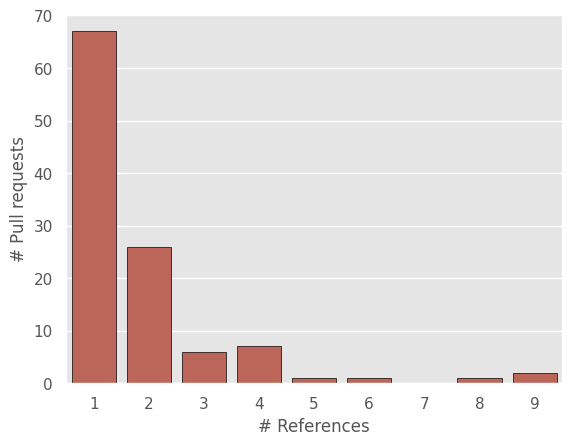

202


In [107]:
import numpy as np
import matplotlib.pyplot as plt
vc = df[["PR url"]].value_counts().value_counts()
vc[7] = 0
vc = vc.sort_index()
print(vc.sort_index())

# np.median(q)
# sum([1 for a in q if a == 1])

# Extract categories and counts
categories = list(range(1, max(vc.keys() + 1)))
counts = list(vc)
import seaborn as sns
print(categories, counts)

with plt.style.context('ggplot'):
    # Create a bar chart (since histograms are for continuous data)
    clr = (0.8004901960784314, 0.3534313725490196, 0.28578431372549007, 1.0)
    # plt.bar(categories, counts, color=clr, edgecolor='black')
    sns.barplot(x=categories, y=counts, palette=[clr], edgecolor="black")
    # Labels and title
    plt.xlabel("# References")
    plt.ylabel("# Pull requests")
    # plt.title("Number of references per referencing pull request")

    # Show the plot
    plt.savefig('../../data/figures/reference-count.pdf')
    plt.show()
    print(f'{sum([a * b for a, b in zip(categories, counts)])}')


In [28]:
# df[((df['Incoming reference'] == 0) & (df['Outgoing reference'] == 0))]

# len(df)

df[["Incoming reference", "Outgoing reference"]].sum() , df[["Incoming reference", "Outgoing reference"]].sum() / len(df)


(Incoming reference     46
 Outgoing reference    156
 dtype: int64,
 Incoming reference    0.227723
 Outgoing reference    0.772277
 dtype: float64)

#### Reference targets.

*How often are the references to a GitHub page vs. something else?*

87% of the references is going to github, 100% of the incoming references is from github (a consequence of our sampling strategy for incoming references).

In [29]:
import regex as re


def is_gh(q):
    if bool(re.match(r'.*github.com.*', str(q))):
        return 1
    return 0


df = df.copy()

df['is GitHub'] = df['What is referenced'].apply(is_gh)
perc_to_gh = df['is GitHub'].mean()
print(perc_to_gh * len(df))

pr_grouped_df = df.groupby(["PR url"])
norm_perc_to_gh = pr_grouped_df['is GitHub'].mean().mean()

print(
    f'Of all references {perc_to_gh * 100:.2f}% is from/to a GitHub project ({norm_perc_to_gh * 100:.2f}% normalized).')

175.0
Of all references 86.63% is from/to a GitHub project (87.71% normalized).


In [30]:
df[df['is GitHub'] == 0]

,PR url,Dataset,Quartile,Owner,Project,What is referenced,Why do they reference it?,Referenced owner,Referenced project,Motivation: change accommodation,...,Solution: specification,Solution: used in change,Solution: (partial) implementation,Solution: affected artifacts,Change consequence,Convention reference,Other/Unknown,Incoming reference,Outgoing reference,is GitHub
35,https://github.com/vaadin/vaadin-material-styl...,"general, link strength",outlier,vaadin,vaadin-material-styles,NaN,"No explicit reference, but the component is ex...",0,0,0,...,0,0,1,0,0,0,0,0,1,0
37,https://github.com/ember-cli/ember-cli/pull/4731,"general, link strength",outlier,ember-cli,ember-cli,NaN,"No explicit reference, but discuss the impact ...",0,0,0,...,0,0,0,0,1,0,0,0,1,0
65,https://github.com/tj/dox/pull/127,"newcomer, so-degree",third,tj,dox,NaN,"No explicit reference, but they reference ""the...",0,0,0,...,0,0,0,0,0,0,0,0,1,0
77,https://github.com/paularmstrong/swig/pull/381,"newcomer, so-degree",fourth,paularmstrong,swig,NaN,"No explicit reference, but the submitter seems...",0,0,0,...,0,0,0,0,0,0,0,0,1,0
78,https://github.com/algolia/expect-jsx/pull/17,"newcomer, so-degree",outlier,algolia,expect-jsx,http://facebook.github.io/react/blog/2016/03/0...,Reference to the documentation for the added f...,0,0,0,...,1,0,0,0,0,0,0,0,1,0
80,https://github.com/aexmachina/ember-notify/pul...,"newcomer, so-degree",outlier,aexmachina,ember-notify,NaN,"No explicit reference, but they're using this ...",0,0,0,...,0,0,0,0,0,0,0,0,1,0
81,https://github.com/fsevents/fsevents/pull/15,"newcomer, so-degree",outlier,fsevents,fsevents,NaN,"No explicit reference, but a commenter mention...",0,0,0,...,0,0,0,0,0,0,0,0,1,0
146,https://github.com/shakacode/sass-resources-lo...,"newcomer, ecosystem",third,shakacode,sass-resources-loader,https://medium.com/webpack/webpack-4-migration...,Reference to the migration guide which they at...,0,0,0,...,1,0,0,0,0,0,0,0,1,0
148,https://github.com/nock/nock/pull/178,"newcomer, ecosystem",third,nock,nock,NaN,"No explicit reference, but they found the prob...",0,0,0,...,0,0,0,0,0,0,0,0,1,0
151,https://github.com/immerjs/immer/pull/384,"newcomer, ecosystem",fourth,immerjs,immer,https://www.jsdelivr.com/features,Referenced webpage is 404. Is likely documenta...,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
# Incoming
ref_df_incoming = df[df['Incoming reference'] == 1]
perc_to_gh = ref_df_incoming['is GitHub'].mean()
to_gh_in = perc_to_gh * len(ref_df_incoming)
pr_grouped_df = ref_df_incoming.groupby(["PR url"])
norm_perc_to_gh = pr_grouped_df['is GitHub'].mean().mean()
print(
    f'Of all PRs with incoming references {to_gh_in:.0f} ({perc_to_gh * 100:.2f}%) is from a GitHub project ({norm_perc_to_gh * 100:.2f}% normalized).')

# Outgoing
ref_df_outgoing = df[df['Outgoing reference'] == 1]
perc_to_gh = ref_df_outgoing['is GitHub'].mean()
to_gh_out = perc_to_gh * len(ref_df_outgoing)
pr_grouped_df = ref_df_outgoing.groupby(["PR url"])
norm_perc_to_gh = pr_grouped_df['is GitHub'].mean().mean()
print(
    f'Of all referencing PRs {to_gh_out:.0f} ({perc_to_gh * 100:.2f}%) is to a GitHub project ({norm_perc_to_gh * 100:.2f}% normalized).')

Of all PRs with incoming references 46 (100.00%) is from a GitHub project (100.00% normalized).
Of all referencing PRs 129 (82.69%) is to a GitHub project (86.55% normalized).


*How often are references to a project from the same owner?*

54% are, which is quite a lot.

In [70]:
ref_df_only_gh = df[df['is GitHub'] == 1]


def ref_same_owner(row):
    if row['Owner'] == row['Referenced owner']:
        return 1
    return 0


ref_df_only_gh.loc[:, ['same owner']] = ref_df_only_gh[[
    'Owner', 'Referenced owner']].apply(ref_same_owner, axis=1)

perc_same_owner = ref_df_only_gh['same owner'].mean()
same_owner = perc_same_owner * len(ref_df_only_gh)
pr_grouped_df = ref_df_only_gh.groupby(["PR url"])
norm_perc_same_owner = pr_grouped_df['same owner'].mean().mean()

print(
    f'The GitHub references are {same_owner:.0f} ({perc_same_owner * 100:.2f}%) to a project of the same owner ({norm_perc_same_owner*100:.2f}% normalized).')

The GitHub references are 96 (54.86%) to a project of the same owner (53.50% normalized).


In [72]:
q_ref_df_only_gh = ref_df_only_gh[ref_df_only_gh['Outgoing reference'] == 1]

perc_same_owner = q_ref_df_only_gh['same owner'].mean()
same_owner = perc_same_owner * len(q_ref_df_only_gh)

print(same_owner, perc_same_owner*100)

72.0 55.81395348837209


#### Why do different groups reference

##### Overview

[33 45 19 23 52  2 10  7  7  8] 206
[78, 94, 34] 206


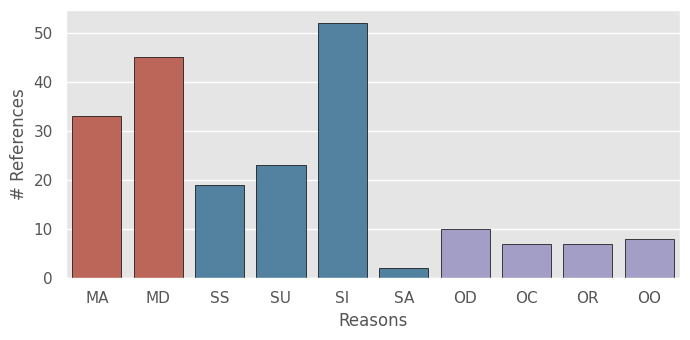

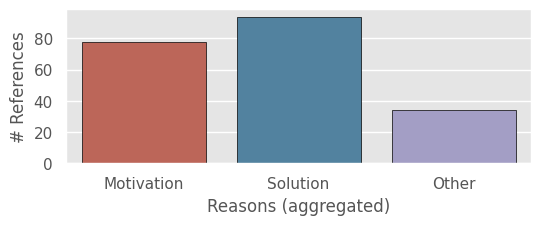

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

reasons = ['Motivation: change accommodation',
           'Motivation: feature/problem/bug description',
           'Solution: specification', 'Solution: used in change',
           'Solution: (partial) implementation', 'Solution: affected artifacts',
           'System description', 'Change consequence', 'Convention reference',
           'Other/Unknown']

reasons_short = ["MA", "MD", "SS", "SU", "SI", "SA", "OD", "OC", "OR", "OO"]

agg_reasons = ["Motivation", "Solution", "Other"]
agg_ranges = [[0, 1], [2, 3, 4], [5, 6, 7, 8, 9]]


def get_motivation_count(df):
    """Returns count, agg_count"""
    counts = np.array(df[reasons].sum())
    agg_counts = [sum(counts[ids]) for ids in agg_ranges]
    return counts, agg_counts


def create_motivation_histogram(df):
    counts, agg_counts = get_motivation_count(df)

    print(counts, sum(counts))
    print(agg_counts, sum(agg_counts))

    # colors = ['#4682B4', '#808000', '#800020']
    colors = [(0.8004901960784314, 0.3534313725490196, 0.28578431372549007, 1.0),
              (0.27107843137254894, 0.5240196078431372, 0.6740196078431373, 1.0),
              (0.6210784313725489, 0.5916666666666667, 0.8004901960784313, 1.0)]

    spec_colors = [colors[0], colors[0], colors[1], colors[1],
                   colors[1], colors[1], colors[2], colors[2], colors[2], colors[2]]

    # all.
    plt.figure(figsize=(7, 3.5))  # Adjust figure size
    sns.barplot(x=reasons_short, y=counts, palette=spec_colors, edgecolor="black")
    # plt.xticks()  # Rotate labels for readability
    plt.xlabel("Reasons", fontsize=12)
    plt.ylabel("# References", fontsize=12)
    # plt.title("Reference reasons", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.savefig('../../data/figures/motivation-count-specific.pdf')
    plt.show()

    # aggregate
    plt.figure(figsize=(6, 2))  # Adjust figure size
    sns.barplot(x=agg_reasons, palette=colors, y=agg_counts, edgecolor="black")
    # plt.xticks()  # Rotate labels for readability
    plt.xlabel("Reasons (aggregated)", fontsize=12)
    plt.ylabel("# References", fontsize=12)
    # plt.title("Reference reasons (aggregate)", fontsize=14, fontweight="bold")
    # plt.tight_layout()
    plt.savefig('../../data/figures/motivation-count.pdf')
    # plt.show()


ref_df = df.copy()
with plt.style.context('ggplot'):

    create_motivation_histogram(ref_df)

##### Incoming and outgoing references

*Do incoming and outgoing references have different referencing motivations?*

In terms of the aggregated motivations: no, they are not different. Zooming into the specific motivations, however, we can see that "change accommodation" is more common for incoming references (which makes sense, as other projects will have to accommodate the changes introduced in this PR), and 'solution specification' which is more common in outgoing references (which also makes sense as the PR might follow some specification). 

In [34]:
from scipy.stats import chi2_contingency, fisher_exact


def compare_ref_reason_distributions(df_a, df_b):
    inc_counts, inc_agg_counts = get_motivation_count(df_a)
    out_counts, out_agg_counts = get_motivation_count(df_b)

    table = [inc_agg_counts, out_agg_counts]
    # Chi-square
    chi2_stat, p_value, _, _ = chi2_contingency(table)
    significant = p_value < 0.05
    print(f'Chi2: {chi2_stat=:.3f} ({p_value=:.3f}, {significant=})')
    print()

    # Fisher for rest
    print("Fisher's exact test:")
    total_in = sum(inc_counts)
    total_out = sum(out_counts)

    for idx, (in_c, out_c) in enumerate(zip(inc_counts, out_counts)):
        label = reasons[idx]
        in_rest = total_in - in_c
        out_rest = total_out - out_c
        # Fisher with laplace smoothing
        table = [[in_c + 1, in_rest + 1], [out_c + 1, out_rest + 1]]
        odds_ratio, p_value = fisher_exact(table, alternative='two-sided')
        significant = p_value < 0.05
        print(f'{label}: {odds_ratio=:.3f} ({p_value=:.3f}, {significant=})')


ref_df = df.copy()
inc_ref_df = ref_df[ref_df['Incoming reference'] == 1]
out_ref_df = ref_df[ref_df['Outgoing reference'] == 1]
compare_ref_reason_distributions(inc_ref_df, out_ref_df)

Chi2: chi2_stat=2.857 (p_value=0.240, significant=False)

Fisher's exact test:
Motivation: change accommodation: odds_ratio=3.110 (p_value=0.004, significant=True)
Motivation: feature/problem/bug description: odds_ratio=0.408 (p_value=0.053, significant=False)
Solution: specification: odds_ratio=0.147 (p_value=0.031, significant=True)
Solution: used in change: odds_ratio=2.039 (p_value=0.131, significant=False)
Solution: (partial) implementation: odds_ratio=1.780 (p_value=0.134, significant=False)
Solution: affected artifacts: odds_ratio=1.097 (p_value=1.000, significant=False)
System description: odds_ratio=0.643 (p_value=0.736, significant=False)
Change consequence: odds_ratio=0.936 (p_value=1.000, significant=False)
Convention reference: odds_ratio=0.398 (p_value=0.688, significant=False)
Other/Unknown: odds_ratio=1.435 (p_value=0.702, significant=False)


##### Newcomers' references

*Do newcomers have different motivations for referencing ecosystem activities?*

This test only included the outgoing references.

No. Though, the aggregated model's p-value is fairly low ($p=0.2$), as is it for 'change accommodation' ($p=0.1$) and 'partial implementations' ($p=0.2$), so more data might reveal something here.

In [76]:
ref_df = df.copy()
ref_df = ref_df[ref_df['is GitHub'] == 1]
ref_df = ref_df[ref_df['Outgoing reference'] == 1]
print(f'n={len(ref_df)}')
new_ref_df = ref_df[ref_df['Dataset'].str.contains('newcomer')]
gen_ref_df = ref_df[ref_df['Dataset'].str.contains('general')]
compare_ref_reason_distributions(new_ref_df, gen_ref_df)

n=129
Chi2: chi2_stat=5.378 (p_value=0.068, significant=False)

Fisher's exact test:
Motivation: change accommodation: odds_ratio=0.414 (p_value=0.088, significant=False)
Motivation: feature/problem/bug description: odds_ratio=0.810 (p_value=0.689, significant=False)
Solution: specification: odds_ratio=2.159 (p_value=0.262, significant=False)
Solution: used in change: odds_ratio=1.504 (p_value=0.577, significant=False)
Solution: (partial) implementation: odds_ratio=1.457 (p_value=0.439, significant=False)
Solution: affected artifacts: odds_ratio=0.258 (p_value=0.323, significant=False)
System description: odds_ratio=2.529 (p_value=0.299, significant=False)
Change consequence: odds_ratio=1.074 (p_value=1.000, significant=False)
Convention reference: odds_ratio=0.208 (p_value=0.078, significant=False)
Other/Unknown: odds_ratio=1.362 (p_value=0.732, significant=False)


##### Experience references.

*Do people with different amounts of experience make referencs for different reasons?*

For this question, we exclusively look at outgoing references.

There is no signfiicant difference between any of the samples and the rest of the dataset. However, in some cases, the measured p-values do drop noticeably ("newcomer, upstream" and "general, so-degree"), which could be interesting for follow up studies. Mergin newcomer and general data does not make a difference here. It even makes effects with follow-up potential less clear, suggesting there is some difference between these two groups (which is backed up by my following point).

There is no statistically significant difference between why newcomers make references. However, again, for both the aggregated and non-aggregated case, does the p value become quite low, making it interesting for follow-up research. 

A comparison between "general, intra"/"general, ecosystem" and all other samples doesn't yield any significant results either. Though, the p value of "general, so-degree" is quite low.

Comparing reference behaviors of people in lower/upper percentiles per dataset yields no interesting results. The aggregated case doesn't either.

PRs that reference the same project don't do anything different either. However, submitters with higher so-degree tend to reference a same-owner project more frequently than submitters with lower so-degree, and newcomers with ecosystem experience tend to do the opposite. In none of our samples do the samples reference same-owner projects differently, however, "general ecosystem" has a low p, as does "newcomer, ecosystem", "newcomer, downstream", and "newcomer, so-degree".


###### Setup

In [36]:
out_ref_df = df.copy()
out_ref_df = out_ref_df[out_ref_df['Outgoing reference'] == 1]
out_ref_df = out_ref_df[out_ref_df['is GitHub'] == 1]
out_ref_df.shape


(129, 22)

Dataset
general, downstream         6
general, ecosystem         11
general, intra              5
general, link strength     10
general, so-degree         16
general, upstream          11
newcomer, downstream       16
newcomer, ecosystem        12
newcomer, link strength    11
newcomer, so-degree        15
newcomer, upstream         16
Name: PR url, dtype: int64


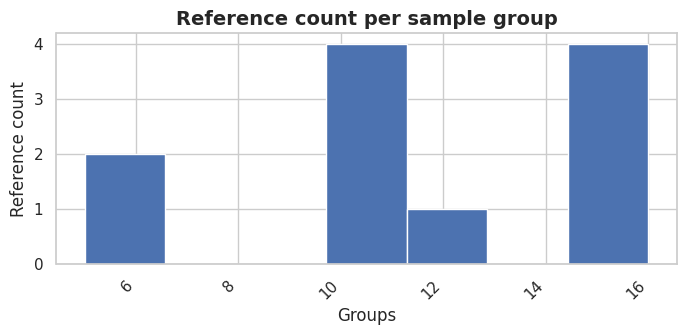

In [37]:
# Number of references per sample group.
ds_df = out_ref_df.groupby("Dataset")
counts = ds_df.count().iloc[:, 0]
print(counts)

plt.figure(figsize=(8, 3))  # Adjust figure size
plt.hist(counts, bins=7)
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.xlabel("Groups", fontsize=12)
plt.ylabel("Reference count", fontsize=12)
plt.title("Reference count per sample group", fontsize=14, fontweight="bold")
plt.show()

###### Comparisons between groups and the aggregate dataset.

In [60]:
# Compares each dataset separately.
datasets = out_ref_df['Dataset'].unique()

for ds_key in datasets:
    ds_df = out_ref_df[out_ref_df["Dataset"] == ds_key]
    non_ds_df = out_ref_df[out_ref_df["Dataset"] != ds_key]
    counts, agg_counts = get_motivation_count(ds_df)
    non_counts, non_agg_counts = get_motivation_count(non_ds_df)

    # We drop the unknown field as they commonly have <5 entries.
    agg_counts = agg_counts[:-1]
    non_agg_counts = non_agg_counts[:-1]
    table = [agg_counts, non_agg_counts]

    chi2 = chi2_contingency(table)
    fish = fisher_exact(table)
    significant = chi2.pvalue < 0.05

    print(f'{ds_key}: {table}, {fish.statistic=:.3f} ({chi2.pvalue=:.3f}, {significant=})')

general, upstream: [[5, 4], [43, 55]], fish.statistic=1.599 (chi2.pvalue=0.746, significant=False)
general, downstream: [[1, 4], [47, 55]], fish.statistic=0.293 (chi2.pvalue=0.494, significant=False)
general, link strength: [[6, 2], [42, 57]], fish.statistic=4.071 (chi2.pvalue=0.158, significant=False)
general, so-degree: [[10, 4], [38, 55]], fish.statistic=3.618 (chi2.pvalue=0.063, significant=False)
newcomer, so-degree: [[3, 11], [45, 48]], fish.statistic=0.291 (chi2.pvalue=0.109, significant=False)
newcomer, link strength: [[4, 7], [44, 52]], fish.statistic=0.675 (chi2.pvalue=0.781, significant=False)
newcomer, upstream: [[4, 12], [44, 47]], fish.statistic=0.356 (chi2.pvalue=0.144, significant=False)
newcomer, downstream: [[7, 6], [41, 53]], fish.statistic=1.508 (chi2.pvalue=0.691, significant=False)
newcomer, ecosystem: [[4, 3], [44, 56]], fish.statistic=1.697 (chi2.pvalue=0.777, significant=False)
general, ecosystem: [[2, 5], [46, 54]], fish.statistic=0.470 (chi2.pvalue=0.615, sig

In [54]:
# Compares newcomers vs. non-newcomers.

ds_df = out_ref_df[out_ref_df["Dataset"].str.contains('newcomer')]
non_ds_df = out_ref_df[out_ref_df["Dataset"].str.contains('general')]

ds_counts, ds_agg_counts = get_motivation_count(ds_df)
non_ds_counts, non_ds_agg_counts = get_motivation_count(non_ds_df)

# Aggregated results.
ds_agg_counts = ds_agg_counts[:-1]
non_ds_agg_counts = non_ds_agg_counts[:-1]
table = [ds_agg_counts, non_ds_agg_counts]
chi2 = chi2_contingency(table)
fish = fisher_exact(table)
significant = chi2.pvalue < 0.05
print(
    f'new vs. general (aggregated): {table} {fish.statistic=:.3f} ({chi2.pvalue=:.3f}, {significant=})')

# Non-aggregated
table = [ds_counts, non_ds_counts]
chi2 = chi2_contingency(table)
significant = chi2.pvalue < 0.05
print(
    f'new vs. general: {chi2.statistic=:.3f} ({chi2.pvalue=:.3f}, {significant=})')

new vs. general (aggregated): [[22, 39], [26, 20]] fish.statistic=0.434 (chi2.pvalue=0.056, significant=False)
new vs. general: chi2.statistic=15.764 (chi2.pvalue=0.072, significant=False)


In [61]:
# Combines the experience types of newcomers and general for each of the experience types.

keys = ['upstream', 'downstream', 'ecosystem',
        'intra', 'link strength', 'so-degree']

for key in keys:
    ds_df = out_ref_df[out_ref_df["Dataset"].str.contains(key)]
    non_ds_df = out_ref_df[~out_ref_df["Dataset"].str.contains(key)]

    ds_counts, ds_agg_counts = get_motivation_count(ds_df)
    non_ds_counts, non_ds_agg_counts = get_motivation_count(non_ds_df)

    # Aggregated results.
    # NOTE: We remove the "Other" entries as there are too few to do Chi2 with.
    ds_agg_counts = ds_agg_counts[:-1]
    non_ds_agg_counts = non_ds_agg_counts[:-1]
    table = [ds_agg_counts, non_ds_agg_counts]
    chi2 = chi2_contingency(table)
    fish = fisher_exact(table)
    significant = chi2.pvalue < 0.05
    print(
        f'{key} (aggregated): {fish.statistic=:.3f} ({chi2.pvalue=:.3f}, {significant=})')

    sufficient_data = all(ele >= 5 for ele in ds_counts) and all(
        ele >= 5 for ele in non_ds_counts)
    if sufficient_data:
        # Non-aggregated
        table = [ds_counts, non_ds_counts]
        chi2 = chi2_contingency(table)
        significant = chi2.pvalue < 0.05
        print(
            f'{key}: {chi2.statistic=:.3f} ({chi2.pvalue=:.3f}, {significant=})')
        print()

upstream (aggregated): fish.statistic=0.620 (chi2.pvalue=0.431, significant=False)
downstream (aggregated): fish.statistic=0.980 (chi2.pvalue=1.000, significant=False)
ecosystem (aggregated): fish.statistic=0.911 (chi2.pvalue=1.000, significant=False)
intra (aggregated): fish.statistic=2.522 (chi2.pvalue=0.856, significant=False)
link strength (aggregated): fish.statistic=1.462 (chi2.pvalue=0.619, significant=False)
so-degree (aggregated): fish.statistic=1.090 (chi2.pvalue=1.000, significant=False)


###### Comparison between intra/eco and the other groups.

In [41]:
intra_df = out_ref_df[out_ref_df['Dataset'].str.contains('intra')]
gen_eco_df = out_ref_df[out_ref_df['Dataset'] == 'general, ecosystem']

other_eco_df = out_ref_df.copy()\
    .drop(intra_df.index)\
    .drop(gen_eco_df.index)
datasets = other_eco_df['Dataset'].unique()

# Gets distributions
# NOTE: We remove the "Other" entries as there are too few to do Chi2 with.
intra_ds_counts, intra_agg_ds_counts = get_motivation_count(intra_df)
gen_eco_ds_counts, gen_eco_agg_ds_counts = get_motivation_count(gen_eco_df)
intra_agg_ds_counts = intra_agg_ds_counts[:-1]
gen_eco_agg_ds_counts = gen_eco_agg_ds_counts[:-1]

for dataset in datasets:
    ds_df = out_ref_df[out_ref_df['Dataset'] == dataset]
    ds_counts, ds_agg_counts = get_motivation_count(ds_df)
    # NOTE: We remove the "Other" entries as there are too few to do Chi2 with.
    ds_agg_counts = ds_agg_counts[:-1]

    # Intra exp.
    table = [ds_agg_counts, intra_agg_ds_counts]
    chi2 = chi2_contingency(table)
    significant = chi2.pvalue < 0.05
    print(
        f'Intra vs. "{dataset}" (aggregated): {chi2.statistic=:.3f} ({chi2.pvalue=:.3f}, {significant=})')

    # General eco
    table = [ds_agg_counts, gen_eco_agg_ds_counts]
    chi2 = chi2_contingency(table)
    significant = chi2.pvalue < 0.05
    print(
        f'General eco vs. "{dataset}" (aggregated): {chi2.statistic=:.3f} ({chi2.pvalue=:.3f}, {significant=})')
    print()


Intra vs. "general, upstream" (aggregated): chi2.statistic=0.000 (chi2.pvalue=1.000, significant=False)
General eco vs. "general, upstream" (aggregated): chi2.statistic=0.327 (chi2.pvalue=0.568, significant=False)

Intra vs. "general, downstream" (aggregated): chi2.statistic=0.320 (chi2.pvalue=0.572, significant=False)
General eco vs. "general, downstream" (aggregated): chi2.statistic=0.000 (chi2.pvalue=1.000, significant=False)

Intra vs. "general, link strength" (aggregated): chi2.statistic=0.000 (chi2.pvalue=1.000, significant=False)
General eco vs. "general, link strength" (aggregated): chi2.statistic=1.637 (chi2.pvalue=0.201, significant=False)

Intra vs. "general, so-degree" (aggregated): chi2.statistic=0.000 (chi2.pvalue=1.000, significant=False)
General eco vs. "general, so-degree" (aggregated): chi2.statistic=1.969 (chi2.pvalue=0.161, significant=False)

Intra vs. "newcomer, so-degree" (aggregated): chi2.statistic=0.744 (chi2.pvalue=0.388, significant=False)
General eco vs. "n

In [42]:
ds_df = df.groupby(['Dataset', 'Quartile'])
ds_df.describe()

Motivation: change accommodation             
                                                            count      mean   
Dataset                 Quartile                                              
general, downstream     first                                 3.0  0.000000  \
                        third                                 4.0  0.250000   
general, ecosystem      first                                 5.0  0.200000   
                        fourth                                2.0  0.500000   
                        second                                2.0  0.000000   
                        third                                 8.0  0.000000   
general, intra          first                                13.0  0.384615   
                        fourth                                3.0  0.000000   
                        outlier                               2.0  1.000000   
                        second                                3.0  0.666667   
                        third                                 1.0  0.000000   
general, link strength  first                                 1.0  0.000000   
                        fourth                                6.0  0.000000   
                        outlier                               3.0  0.333333   
                        second                                2.0  0.500000   
                        third                                 5.0  0.200000   
general, so-degree      first                                 4.0  0.000000   
                        fourth                                7.0  0.428571   
                        outlier                               5.0  0.000000   
                        second                                5.0  0.000000   
                        third                                 3.0  0.333333   
general, upstream       first                                 5.0  0.000000   
                        fourth                                6.0  0.500000   
                        second                                2.0  0.000000   
                        third                                 4.0  0.250000   
newcomer, downstream    first                                 3.0  0.000000   
                        fourth                                6.0  0.000000   
                        outlier                               3.0  0.000000   
                        second                                6.0  0.166667   
                        third                                 4.0  0.000000   
newcomer, ecosystem     first                                 3.0  0.333333   
                        fourth                                8.0  0.125000   
                        outlier                               3.0  0.000000   
                        second                                1.0  0.000000   
                        third                                 4.0  0.250000   
newcomer, link strength first                                 8.0  0.125000   
                        fourth                                1.0  0.000000   
                        outlier                               3.0  0.000000   
                        second                                1.0  0.000000   
                        third                                 3.0  0.333333   
newcomer, so-degree     fourth                               10.0  0.000000   
                        outlier                               4.0  0.000000   
                        second                                1.0  1.000000   
                        third                                 5.0  0.000000   
newcomer, upstream      first                                 7.0  0.142857   
                        fourth                                2.0  0.000000   
                        outlier                               1.0  0.000000   
                        second                                7.0  0.285714   
    

###### Do people with different amounts of experience reference differently?

In [43]:
data_cols = ['Motivation: change accommodation',
             'Motivation: feature/problem/bug description', 'System description',
             'Solution: specification', 'Solution: used in change',
             'Solution: (partial) implementation', 'Solution: affected artifacts',
             'Change consequence', 'Convention reference', 'Other/Unknown']

agg_reasons = ["Motivation", "Solution", "Other"]
agg_ranges = [[0, 1], [2, 3, 4], [5, 6, 7, 8]]


def calc_agg(distr):
    res = [sum(distr[rng]) for rng in agg_ranges]
    return res


exp_df = out_ref_df.copy()

exp_df["Quartile"] = exp_df["Quartile"].replace(
    {'first': 'bottom', "second": "bottom", "third": "top", "fourth": "top"})

datasets = exp_df['Dataset'].unique()


for dataset in datasets:
    ds_df = exp_df[exp_df['Dataset'] == dataset]

    vc = ds_df.groupby("Quartile")[data_cols].sum()
    vc_bottom = np.array(vc.loc[['bottom'], :])[0]
    vc_top = np.array(vc.loc[['top'], :])[0]

    agg_vc_bottom = calc_agg(vc_bottom)
    agg_vc_top = calc_agg(vc_top)

    agg_vc_bottom = agg_vc_bottom[:-1]
    agg_vc_top = agg_vc_top[:-1]
    # agg_vc_bottom = [ele + 1 for ele in agg_vc_bottom]
    # agg_vc_top = [ele + 1 for ele in agg_vc_top]

    table = [agg_vc_top, agg_vc_bottom]
    fisher = fisher_exact(table)
    significant = fisher.pvalue < 0.05
    print(f'{dataset}: {fisher.statistic=:.3f} ({fisher.pvalue=:.3f}, {significant=})')

general, upstream: fisher.statistic=0.750 (fisher.pvalue=1.000, significant=False)
general, downstream: fisher.statistic=nan (fisher.pvalue=1.000, significant=False)
general, link strength: fisher.statistic=nan (fisher.pvalue=1.000, significant=False)
general, so-degree: fisher.statistic=1.667 (fisher.pvalue=1.000, significant=False)
newcomer, so-degree: fisher.statistic=0.000 (fisher.pvalue=1.000, significant=False)
newcomer, link strength: fisher.statistic=0.500 (fisher.pvalue=1.000, significant=False)
newcomer, upstream: fisher.statistic=0.556 (fisher.pvalue=1.000, significant=False)
newcomer, downstream: fisher.statistic=4.000 (fisher.pvalue=0.524, significant=False)
newcomer, ecosystem: fisher.statistic=0.000 (fisher.pvalue=0.429, significant=False)
general, ecosystem: fisher.statistic=inf (fisher.pvalue=1.000, significant=False)
general, intra: fisher.statistic=0.000 (fisher.pvalue=0.333, significant=False)


In [44]:
# ds_df = exp_df[exp_df['Dataset'].str.contains('general')]

vc = exp_df.groupby("Quartile")[data_cols].sum()
vc_bottom = np.array(vc.loc[['bottom'], :])[0]
vc_top = np.array(vc.loc[['top'], :])[0]

agg_vc_bottom = calc_agg(vc_bottom)
agg_vc_top = calc_agg(vc_top)

agg_vc_bottom = agg_vc_bottom[:-1]
agg_vc_top = agg_vc_top[:-1]
# agg_vc_bottom = [ele + 1 for ele in agg_vc_bottom]
# agg_vc_top = [ele + 1 for ele in agg_vc_top]

table = [agg_vc_top, agg_vc_bottom]
fisher = fisher_exact(table)
significant = fisher.pvalue < 0.05
print(f'{dataset}: {fisher.statistic=:.3f} ({fisher.pvalue=:.3f}, {significant=})')

general, intra: fisher.statistic=0.971 (fisher.pvalue=1.000, significant=False)


###### Self-references

In [45]:
data_cols = ['Motivation: change accommodation',
             'Motivation: feature/problem/bug description', 'System description',
             'Solution: specification', 'Solution: used in change',
             'Solution: (partial) implementation', 'Solution: affected artifacts',
             'Change consequence', 'Convention reference', 'Other/Unknown']

agg_reasons = ["Motivation", "Solution", "Other"]
agg_ranges = [[0, 1], [2, 3, 4], [5, 6, 7, 8]]


def calc_agg(distr):
    res = [sum(distr[rng]) for rng in agg_ranges]
    return res


def has_self_reference(row):
    return row['Owner'] == row['Referenced owner']


self_df = out_ref_df.copy()

self_df['Same project'] = self_df.apply(has_self_reference, axis=1)
vc = self_df.groupby("Same project")[data_cols].value_counts()
vc_true = np.array(vc[True])
vc_false = np.array(vc[False])

agg_vc_true = calc_agg(vc_true)
agg_vc_false = calc_agg(vc_false)

agg_vc_true = agg_vc_true[:-1]
agg_vc_false = agg_vc_false[:-1]

table = [agg_vc_true, agg_vc_false]

chi2 = chi2_contingency(table)

print(f'{chi2.statistic=:.3f}, {chi2.pvalue=:.3f}')
print(f'{table=}')

chi2.statistic=0.000, chi2.pvalue=1.000
table=[[36, 23], [27, 18]]


In [63]:
df.apply(has_self_reference, axis=1).sum()
df[df['is GitHub']].apply(has_self_reference, axis=1).sum()

KeyError: "None of [Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\n       ...\n       1, 0, 0, 1, 1, 1, 1, 1, 1, 1],\n      dtype='int64', length=202)] are in the [columns]"

In [46]:
exp_df = self_df.copy()
exp_df["Quartile"] = exp_df["Quartile"].replace(
    {'first': 'bottom', "second": "bottom", "third": "top", "fourth": "top"})

datasets = exp_df['Dataset'].unique()


for dataset in datasets:
    ds_df = exp_df[exp_df['Dataset'] == dataset]
    non_ds_df = exp_df[exp_df['Dataset'] != dataset]

    # Compare bottom with top quartile.
    vc = ds_df.groupby("Quartile")["Same project"].value_counts()
    vc_b_true = vc['bottom'][True]if True in vc['bottom'] else 0
    vc_b_false = vc['bottom'][False] if False in vc['bottom'] else 0
    vc_t_true = vc['top'][True]if True in vc['top'] else 0
    vc_t_false = vc['top'][False]if False in vc['top'] else 0
    table = [[vc_t_true + 1, vc_t_false + 1], [vc_b_true + 1, vc_b_false + 1]]
    fisher = fisher_exact(table)
    significant = fisher.pvalue < 0.05
    print(f'{dataset}: {table=}, {fisher.statistic=:.3f} ({fisher.pvalue=:.3f}, {significant=})')

    # Compare class with rest of df
    ds_vc = [vc_b_true + vc_t_true, vc_b_false + vc_t_false]
    non_ds_vc = np.array(non_ds_df['Same project'].value_counts())
    table = [[ds_vc[0] + 1, ds_vc[1] + 1], [non_ds_vc[0] + 1, non_ds_vc[1] + 1]]
    # print(non_ds_vc)
    # print(table)
    fisher = fisher_exact(table)
    significant = fisher.pvalue < 0.05
    print(f'{dataset}: {table=}, {fisher.statistic=:.3f} ({fisher.pvalue=:.3f}, {significant=})')
    print()

general, upstream: table=[[4, 3], [5, 3]], fisher.statistic=0.800 (fisher.pvalue=1.000, significant=False)
general, upstream: table=[[8, 5], [66, 54]], fisher.statistic=1.309 (fisher.pvalue=0.773, significant=False)

general, downstream: table=[[1, 5], [3, 1]], fisher.statistic=0.067 (fisher.pvalue=0.190, significant=False)
general, downstream: table=[[3, 5], [71, 54]], fisher.statistic=0.456 (fisher.pvalue=0.465, significant=False)

general, link strength: table=[[6, 4], [2, 1]], fisher.statistic=0.750 (fisher.pvalue=1.000, significant=False)
general, link strength: table=[[7, 4], [66, 55]], fisher.statistic=1.458 (fisher.pvalue=0.754, significant=False)

general, so-degree: table=[[8, 1], [2, 6]], fisher.statistic=24.000 (fisher.pvalue=0.015, significant=True)
general, so-degree: table=[[9, 6], [65, 50]], fisher.statistic=1.154 (fisher.pvalue=1.000, significant=False)

newcomer, so-degree: table=[[11, 4], [2, 1]], fisher.statistic=1.375 (fisher.pvalue=1.000, significant=False)
newcom

#### What do they reference

##### Self-references

*How often do the PRs with external references refer to a project in which the submitter themselves was active?*

I'm not sure we can accurately answer this accurately, considering only ~50% of the referenced activities are present in our dataset.

However, of those references, the submitter of the PR was involved in some manner (commenter, submitter, reviewer, etc.) in 57% of the referenced issues and 78% of the referenced pull requests. In other words, they are involved in the ecosystem.

Interestingly, about 50% of the references is involved in a dependency with the referenced pull request. There is no statically significant difference between upstream/downstream dependencies, though. For all except one (i.e., 1 out of 20), such dependency is on another project owned by the same organization. This strongly hints towards socio-technical congruence within these clusters from an organizational perspective.

In [47]:
ref_df = df.copy()
ref_df = ref_df[ref_df['is GitHub'] == 1]
ref_df = ref_df[ref_df['Outgoing reference'] == 1]
print(f'n={len(ref_df)}')

n=129


In [48]:
import regex as re

expr = re.compile(
    r'^https?:\/\/github\.com\/([^\/]+)\/([^\/]+)\/(pull|issues)\/(\d+)')
activities = [expr.findall(url)[0] for url in ref_df['PR url']]
referenced_activities = [expr.findall(url)
                         for url in ref_df['What is referenced']]

references = [(source, target[0]) for source, target in zip(
    activities, referenced_activities) if len(target) > 0]
print(f'{len(references)=}')

issue_references = [ref for ref in references if ref[1][2] == 'issues']
print(f'{len(issue_references)=}')

pull_references = [ref for ref in references if ref[1][2] == 'pull']
print(f'{len(pull_references)=}')

# print()
# print(issue_references[1])

len(references)=84
len(issue_references)=47
len(pull_references)=37


In [49]:
import json
from pathlib import Path
import tqdm

issue_path = Path(
    r'../../data/libraries/npm-libraries-1.6.0-2020-01-12/issues/issues_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes.json').absolute()
pull_path = Path(
    r'../../data/libraries/npm-libraries-1.6.0-2020-01-12/pull-requests/pulls_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes.json').absolute()


def to_key(ref, idx):
    return (ref[idx][0].lower(), ref[idx][1].lower(), ref[idx][3].lower())


def get_referenced_activities(path, references, idx):
    reference_targets = {to_key(ref, idx): None for ref in references}

    found = 0
    print(f'{path=}')
    with open(path, 'r', encoding='utf-8') as jsonl_file:
        progbar = tqdm.tqdm(jsonl_file)
        for line in progbar:
            jdata = json.loads(line)

            source_path = jdata["__source_path"]
            proj_details = source_path.split("/")[-1].split(".")[0].split("--")
            proj_owner, proj_name = proj_details[0], proj_details[1]
            activity_number = jdata['number']
            key = (proj_owner, proj_name, str(activity_number))

            if key in reference_targets:
                reference_targets[key] = jdata
                found += 1
                progbar.set_description(f'Found {found} activities')

    references = [(ref[0], ref[1], reference_targets[to_key(ref, idx)])
                  for ref in references]
    references = [ref for ref in references if not ref[2] is None]
    return references

In [50]:
referenced_issues = get_referenced_activities(
    issue_path, issue_references, idx=1)
referenced_pulls = get_referenced_activities(pull_path, pull_references, idx=1)

path=PosixPath('/workspaces/msc_thesis/python_proj/modelling/../../data/libraries/npm-libraries-1.6.0-2020-01-12/issues/issues_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes.json')


552it [00:00, 2724.65it/s]

Found 6 activities: : 819722it [05:58, 2288.15it/s]


KeyboardInterrupt: 

In [ ]:
issues_captured = len(referenced_issues) / len(issue_references)
pulls_captured = len(referenced_pulls) / len(pull_references)

print(f'{issues_captured*100=:.2f}%, {pulls_captured*100=:.2f}%')

issues_captured*100=44.68%, pulls_captured*100=54.05%


In [ ]:
refs = list(itertools.chain(pull_references, issue_references))
referencing_pulls = get_referenced_activities(
    pull_path, refs, idx=0)

path=PosixPath('/workspaces/msc_thesis/python_proj/modelling/../../data/libraries/npm-libraries-1.6.0-2020-01-12/pull-requests/pulls_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes.json')


Found 64 activities: : 1815972it [07:11, 4204.16it/s]


In [ ]:
refs = {to_key(ele, idx=0): ele for ele in referencing_pulls}

iss_ref = list()

for issue in referenced_issues:
    key = to_key(issue, idx=0)
    source = refs[key][2]
    target = issue[2]
    reference = (source, target)
    iss_ref.append(reference)

pull_ref = list()

for pull in referenced_pulls:
    key = to_key(pull, idx=0)
    if key in refs:
        source = refs[key][2]
        target = pull[2]
        reference = (source, target)
        pull_ref.append(reference)

In [ ]:
from collections.abc import Sequence, Mapping
from typing import Any


def get_all_involved_users(activity: Mapping | Any):
    if not isinstance(activity, Mapping):
        return
    for key, value in activity.items():
        if key == 'user_data':
            yield value
            continue
        if isinstance(value, Mapping):
            yield from get_all_involved_users(value)
        if isinstance(value, Sequence):
            for ele in value:
                yield from get_all_involved_users(ele)


def get_all_involved_users_as_a_set(activity):
    return {user['login'] for user in get_all_involved_users(activity) if 'login' in user}


In [ ]:
def count_self_involved(activities):
    n = 0
    for ele in activities:
        submitter = ele[0]['user_data']['login']
        users = get_all_involved_users_as_a_set(ele[1])
        if submitter in users:
            n += 1

    print(f'{n}/{len(activities)} ({n/len(activities)*100:.2f}%)')


count_self_involved(iss_ref)
count_self_involved(pull_ref)

12/21 (57.14%)
14/18 (77.78%)


In [ ]:
from python_proj.data_preprocessing.sliding_window_features.dependency_ecosystem_experience.dependency_loading import load_dependency_map

dependencies, name_mapping = load_dependency_map()

Attempting quick load dependencies.
Loading projects and dependencies from: "/workspaces/msc_thesis/data/libraries/npm-libraries-1.6.0-2020-01-12/ql_dependencies.csv".
Finished quick load!
Loaded 1727528 projects and 1933611 projects with dependencies.
Loaded dependency data in 0:00:44.533183.


In [ ]:
def count_dependency_references(references):
    n_source_depends_on_target = 0
    n_target_depends_on_source = 0
    n_no_dependency = 0

    for source, target in references:
        source_name = f'{source[0]}/{source[1]}'.lower()
        if not source_name in name_mapping:
            continue
        source_id = name_mapping[source_name]

        target_name = f'{target[0]}/{target[1]}'.lower()
        if not target_name in name_mapping:
            continue
        target_id = name_mapping[target_name]

        if target_id in dependencies[source_id]:
            print("Source depends on target:", source, target)
            n_source_depends_on_target += 1
        elif source_id in dependencies[target_id]:
            print("Target depends on source:", source, target)
            n_target_depends_on_source += 1
        else:
            # print(f'Neither: {source, target}')
            n_no_dependency += 1

    print()
    print(f'{n_source_depends_on_target=}, {n_target_depends_on_source=}, {n_no_dependency=}')
    print()
    return n_source_depends_on_target, n_target_depends_on_source, n_no_dependency


iss_sot, iss_tos, iss_no = count_dependency_references(issue_references)
pul_sot, pul_tos, pul_no = count_dependency_references(pull_references)

table = [[iss_sot, iss_tos, iss_no], [pul_sot, pul_tos, pul_no]]
chi2 = chi2_contingency(table)
significant = chi2.pvalue < 0.05
print(f'all: {table} {chi2.statistic=:.3f}, ({chi2.pvalue=:.3f}, {significant=})')
print()

table = [[iss_sot + iss_tos, iss_no], [pul_sot + pul_tos, pul_no]]
chi2 = chi2_contingency(table)
significant = chi2.pvalue < 0.05
print(f'dep vs. no dep: {table} {chi2.statistic=:.3f}, ({chi2.pvalue=:.3f}, {significant=})')
print()

table = [[iss_sot, iss_tos], [pul_sot, pul_tos]]
chi2 = chi2_contingency(table)
significant = chi2.pvalue < 0.05
print(f'upstream vs. downstream: {table} {chi2.statistic=:.3f}, ({chi2.pvalue=:.3f}, {significant=})')

Target depends on source: ('canjs', 'can-stache', 'pull', '144') ('canjs', 'canjs', 'issues', '2925')
Target depends on source: ('screwdriver-cd', 'data-schema', 'pull', '166') ('screwdriver-cd', 'screwdriver', 'issues', '616')
Target depends on source: ('screwdriver-cd', 'models', 'pull', '132') ('screwdriver-cd', 'screwdriver', 'issues', '312')
Target depends on source: ('microsoft', 'pxt-common-packages', 'pull', '50') ('microsoft', 'pxt-adafruit', 'issues', '152')
Target depends on source: ('canjs', 'can-simple-map', 'pull', '64') ('canjs', 'canjs', 'issues', '4170')
Target depends on source: ('canjs', 'can-view-parser', 'pull', '30') ('canjs', 'canjs', 'issues', '2747')
Target depends on source: ('browserify', 'insert-module-globals', 'pull', '42') ('browserify', 'browserify', 'issues', '707')
Target depends on source: ('canjs', 'can-list', 'pull', '13') ('canjs', 'canjs', 'issues', '1616')
Target depends on source: ('ckeditor', 'ckeditor5-ui', 'pull', '102') ('ckeditor', 'ckedito

## Question 4: The new SO-degree

What is the impact of using the "new" second-order degree calculation on our results?

_I experimented with this a couple of months ago ([here](https://github.com/wmeijer221/msc_thesis/pull/5)), which suggested limited impact. The metric wasn't completely right, though, for which we should test it again. I more or less copied that solution into this notebook, but changed the following:_
- The metric divides by $|N|$ instead of $|N| + 1$. When $N$ is the empty set, the value of the entire calculation is 0.
- The SNA metric filters for bots more aggressively, not adding any node that is a bot, nor an edge to said nodes.


#### Generating a bot list

In [4]:
from python_proj.data_filters.post_sort_filters import build_filters
from typing import Dict

bot_filters = build_filters("uadgbn")


def is_bot(user_data: Dict):
    # HACK: the filters assume it's a PR entry.
    wrapper = {"user_data": user_data}
    is_bot = any(not test_entry_is_human(wrapper)
                 for test_entry_is_human in bot_filters)
    return is_bot

In [2]:
# NOTE: This looks unused, but actually it runs the code in the script, so don't remove it.
# ALSO NOTE: This is quite quite slow...
import python_proj.helpers.filter_dey_2019_botlist

In [53]:
# Apparently I removed the code that created the file for this. So here goes.
import pandas as pd
gol_bot_df = pd.read_csv('../../data/bot_data/groundtruthbots.csv', header=0)
gol_bot_df = gol_bot_df[gol_bot_df['type'] == 'Bot']
gol_bot_df.to_csv('../../data/bot_data/golzadeh_2021_bots.csv', index=False)

In [ ]:
user_data = {"type": "true", "login": "brotherlogic"}
line = {"user_data": user_data}
bot_a = is_bot(user_data)
# print(bot_a)

user_data = {"type": "true", "login": "jenkins"}
line = {"user_data": user_data}
bot_b = is_bot(user_data)
# print(bot_b)

if not (bot_a and bot_b):
    # NOTE: this is some weird buggy behavior for e.g. if you run the cells out of order and mess up the global variables as a consequence.
    print("The bot filter files didn't load properly; reload your editor.")

In [21]:
import json

paths = [
    "../../data/development_activities/issues_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes.json",
    "../../data/development_activities/pulls_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes.json"
]


def iterate_through_jsonl_files(paths):
    for path in paths:
        with open(path, 'r', encoding='utf-8') as jsonl_file:
            for line in jsonl_file:
                entry = json.loads(line)
                yield entry


# q = next(iterate_through_jsonl_files(paths))

# print(q)


def search_users_in_json(entry: dict):
    if 'id' in entry and 'login' in entry:
        yield entry

    for _, value in entry.items():
        if isinstance(value, dict):
            yield from search_users_in_json(value)
        if isinstance(value, list):
            for ele in value:
                yield from search_users_in_json(ele)


def filter_user_details(user: dict):
    return {"id": user['id'], 'login': user['login']}


# all_users = dict()
# ids = [filter_user_details(user) for user in search_users_in_json(q)]
# all_users.update({entry['id']: entry for entry in ids})
# print(all_users)

{'id': 1008, 'number': 2, 'title': 'more cowbell', 'state': 'closed', 'locked': False, 'comments': 5, 'created_at': '2009-04-17T04:43:30Z', 'updated_at': '2014-09-12T03:45:05Z', 'closed_at': '2009-04-21T21:46:35Z', 'author_association': 'NONE', 'body': '', 'state_reason': 'completed', 'user_data': {'login': 'webiest', 'id': 10476, 'gravatar_id': '', 'type': 'Organization', 'site_admin': False, 'name': 'Webiest'}, 'comments_data': [{'id': 298, 'created_at': '2009-04-17T05:24:37Z', 'updated_at': '2009-04-17T05:24:37Z', 'author_association': 'NONE', 'body': 'gold plated diapers\n', 'user_data': {'login': 'ghost', 'id': 10137, 'gravatar_id': '', 'type': 'User', 'site_admin': False, 'name': 'Deleted user'}}, {'id': 434, 'created_at': '2009-04-17T11:47:50Z', 'updated_at': '2009-04-17T11:47:50Z', 'author_association': 'NONE', 'body': '+1\n', 'user_data': {'login': 'mischa', 'id': 13589, 'gravatar_id': '', 'type': 'User', 'site_admin': False, 'name': 'Mischa'}}, {'id': 445, 'created_at': '2009

In [28]:
import tqdm
users = set()
bots = dict()

# NOTE: this is pretty slow. it takes about 20 minutes.
for entry in tqdm.tqdm(iterate_through_jsonl_files(paths)):
    for user_data in search_users_in_json(entry):
        uid = user_data['id']
        if uid in users or uid in bots:
            continue
        try:
            is_bot_user = is_bot(user_data)
        except KeyError:
            is_bot_user = True
        if is_bot_user:
            bots[uid] = user_data
        else:
            users.add(uid)

print(f'{len(bots)=}')
print(f'{len(users)=}')

0it [00:00, ?it/s]

3984069it [20:28, 3242.91it/s]

len(bots)=128310
len(users)=880181


In [29]:
import pandas as pd

bot_ids = pd.DataFrame(bots.keys(), columns=["Bot ID"])
bot_ids.to_csv("../../data/bot_data/all_bot_ids.csv", index=False)

#### Running test

In [25]:
from python_proj.data_preprocessing.sliding_window_3 import all_features_factory, create_sliding_window_dataset

import python_proj.utils.exp_utils as exp_utils
from pathlib import Path
from functools import partial

base_base_path = Path(exp_utils.BASE_PATH).absolute()
base_path = base_base_path.joinpath("test")

output_path = base_path.joinpath("non_ftc_data.csv")
chunk_base = str(base_path.joinpath("chunks")) + "/"
chunk_output_base = str(base_path.joinpath("chunk_output")) + "/"

issue_path = "issues_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes"
pr_path = "pulls_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes"

feature_factory = partial(all_features_factory, use_sna=True)
create_sliding_window_dataset(
    output_path,
    chunk_base,
    chunk_output_base,
    [issue_path],
    [pr_path],
    feature_factory,
    window_size_in_days=90,
    thread_count=-1,
    chunk_count=2,
    delete_chunk_results=False,
    skip_first_n_chunks=40
)

Using output path "/workspaces/msc_thesis/data/test/non_ftc_data.csv".
Using chunk base path: "/workspaces/msc_thesis/data/test/chunks/".
Using chunk output base path: "/workspaces/msc_thesis/data/test/chunk_output/".
Only processing a subset of chunks [40, 42]. This is for testing.
Loading bot IDs from "/workspaces/msc_thesis/data/bot_data/all_bot_ids.csv".
Loaded list of 128310 bot IDs.
Loading bot IDs from "/workspaces/msc_thesis/data/bot_data/all_bot_ids.csv".
Loaded list of 128310 bot IDs.
Loaded 43/48 output features:
	Feature 01: (output: True) IntraProjectSubmitterIssueSubmissionCount
	Feature 02: (output: True) IntraProjectSubmitterIssueCommentCount
	Feature 03: (output: True) EcosystemSharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator
	Feature 04: (output: True) EcosystemSharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter
	Feature 05: (output: True) EcosystemSharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter
	Feature 06: (output: T

In [1]:
import pandas as pd
from pathlib import Path

test_df_path = Path("../../data/test/non_ftc_data.csv").absolute()

test_df = pd.read_csv(test_df_path, header=0)

# print(test_df.columns)
test_df.describe()

,ID,Submitter ID,PR Number,ControlPullRequestLifeTimeInMinutes,ControlNumberOfCommitsInPullRequest,NormalizedSecondOrderEcosystemDegreeCentrality(PRIntegratorToSubmitterV2.PRIntegratorToSubmitterV2),NormalizedSecondOrderEcosystemDegreeCentrality(PRIntegratorToSubmitterV2.PRCommenterToSubmitterV2),NormalizedSecondOrderEcosystemDegreeCentrality(PRIntegratorToSubmitterV2.PRCommenterToCommenterV2),NormalizedSecondOrderEcosystemDegreeCentrality(PRIntegratorToSubmitterV2.IssueCommenterToCommenterV2),NormalizedSecondOrderEcosystemDegreeCentrality(PRIntegratorToSubmitterV2.IssueCommenterToSubmitterV2),...,EcosystemSharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter,EcosystemSharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter,EcosystemExperienceSubmitterIssueSubmissionCount,EcosystemExperienceSubmitterIssueCommentCount,DependencyEcosystemExperienceSubmitterIssueSubmissionCount,DependencyEcosystemExperienceSubmitterIssueCommentCount,NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount,NonDependencyEcosystemExperienceSubmitterIssueCommentCount,InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount,InversedDependencyEcosystemExperienceSubmitterIssueCommentCount
count,2.157340e+05,2.157340e+05,215734.000000,2.157340e+05,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,...,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000
mean,2.617950e+08,8.025221e+06,5633.471414,3.171049e+04,5.130415,9.359816,7.115052,16.062074,29.025102,8.847084,...,0.050182,0.684816,1.920782,13.520627,0.154765,0.481769,1.667095,12.263218,0.126452,0.822017
std,7.272403e+07,1.110025e+07,10190.807105,1.527961e+05,60.936097,31.905101,22.599004,48.716049,85.914644,26.670183,...,0.712306,10.541948,5.318331,53.135025,1.271246,3.133839,4.815818,51.289907,1.326675,9.991033
min,2.005000e+03,4.000000e+00,1.000000,3.333333e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.651348e+08,6.174810e+05,209.000000,6.188750e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.796711e+08,3.082655e+06,1066.000000,1.052317e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.952019e+08,1.091163e+07,4732.000000,7.149917e+03,3.000000,4.600000,4.851389,9.600000,17.777778,5.700000,...,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
max,3.132006e+08,5.471827e+07,44589.000000,4.489490e+06,10000.000000,752.000000,729.000000,1148.000000,1670.000000,536.000000,...,54.000000,1421.000000,140.000000,1057.000000,76.000000,207.000000,140.000000,1031.000000,118.000000,798.000000


In [2]:
org_df_path = Path("../../data/final_data/non_ftc_data.csv").absolute()
org_df = pd.read_csv(test_df_path, header=0)
# print(org_df.columns)
org_df.describe()

,ID,Submitter ID,PR Number,ControlPullRequestLifeTimeInMinutes,ControlNumberOfCommitsInPullRequest,NormalizedSecondOrderEcosystemDegreeCentrality(PRIntegratorToSubmitterV2.PRIntegratorToSubmitterV2),NormalizedSecondOrderEcosystemDegreeCentrality(PRIntegratorToSubmitterV2.PRCommenterToSubmitterV2),NormalizedSecondOrderEcosystemDegreeCentrality(PRIntegratorToSubmitterV2.PRCommenterToCommenterV2),NormalizedSecondOrderEcosystemDegreeCentrality(PRIntegratorToSubmitterV2.IssueCommenterToCommenterV2),NormalizedSecondOrderEcosystemDegreeCentrality(PRIntegratorToSubmitterV2.IssueCommenterToSubmitterV2),...,EcosystemSharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter,EcosystemSharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter,EcosystemExperienceSubmitterIssueSubmissionCount,EcosystemExperienceSubmitterIssueCommentCount,DependencyEcosystemExperienceSubmitterIssueSubmissionCount,DependencyEcosystemExperienceSubmitterIssueCommentCount,NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount,NonDependencyEcosystemExperienceSubmitterIssueCommentCount,InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount,InversedDependencyEcosystemExperienceSubmitterIssueCommentCount
count,2.157340e+05,2.157340e+05,215734.000000,2.157340e+05,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,...,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000,215734.000000
mean,2.617950e+08,8.025221e+06,5633.471414,3.171049e+04,5.130415,9.359816,7.115052,16.062074,29.025102,8.847084,...,0.050182,0.684816,1.920782,13.520627,0.154765,0.481769,1.667095,12.263218,0.126452,0.822017
std,7.272403e+07,1.110025e+07,10190.807105,1.527961e+05,60.936097,31.905101,22.599004,48.716049,85.914644,26.670183,...,0.712306,10.541948,5.318331,53.135025,1.271246,3.133839,4.815818,51.289907,1.326675,9.991033
min,2.005000e+03,4.000000e+00,1.000000,3.333333e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.651348e+08,6.174810e+05,209.000000,6.188750e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.796711e+08,3.082655e+06,1066.000000,1.052317e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.952019e+08,1.091163e+07,4732.000000,7.149917e+03,3.000000,4.600000,4.851389,9.600000,17.777778,5.700000,...,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
max,3.132006e+08,5.471827e+07,44589.000000,4.489490e+06,10000.000000,752.000000,729.000000,1148.000000,1670.000000,536.000000,...,54.000000,1421.000000,140.000000,1057.000000,76.000000,207.000000,140.000000,1031.000000,118.000000,798.000000


In [ ]:
non_comp_columns = [
    col for col in test_df.columns if not col in org_df.columns]

test_df = test_df.drop(non_comp_columns, axis=1)
test_df = test_df.select_dtypes(include='number')

org_df = org_df[org_df['ID'].isin(test_df['ID'])]

print(org_df.shape)
print(test_df.shape)

(215734, 72)
(215734, 64)


In [ ]:
for col in test_df.columns:
    my_df = pd.DataFrame()

    test_key = f'test_{col}'
    org_key = f'org_{col}'
    my_df.loc[:, [test_key]] = test_df[col]
    my_df.loc[:, [org_key]] = org_df[col]

    corr = my_df.corr(method='spearman')
    # corr = corr.loc[test_key, org_key]
    corr = corr.min().min()
    if corr < 1:
        print(f'{col}: {corr}')

my_df.describe()

,test_InversedDependencyEcosystemExperienceSubmitterIssueCommentCount,org_InversedDependencyEcosystemExperienceSubmitterIssueCommentCount
count,215734.000000,215734.000000
mean,0.822017,0.822017
std,9.991033,9.991033
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,798.000000,798.000000
